# Анализ и прогнозирование неоднородных временных рядов



# Семинар 6. Временные ряды - анализ и модели

## Раздел 1. Временные ряды. Обработка, форматирование, визуализация

Временной ряд — собранный в разные моменты времени статистический материал о значении каких-либо параметров исследуемого процесса.

Скалярным временным рядом 

$$\{x_i\}_{i=1}^N$$

называется массив из $N$ чисел, представляющих собой значения некоторой измеренной (наблюдаемой) динамической переменной $x(t)$ с некоторым постоянным шагом $τ$ по времени,

 $$t_i = t_0 + (i − 1)τ : x_i = x(t_i), i = 1, . . . , N.$$  

Примеры: 
- объёмы продаж в торговых сетях
- объёмы потребления и цены электроэнергии
- остатки складских запасов
- рыночные цены
- дорожный трафик (прогнозирование пробок)

**Вопрос:** Какие задачи здесь возникают?

### Чтение данных

В рамках этого ноутбука будем работать с данными по продажам в Индии в различных городах и штатах

Для начала визуализируем наши данные и попробуем сформулировать новые гипотезы о задаче, которую хотим решить.

Загрузим данные и посмотрим на структуру данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

pd.options.display.float_format = '{:.2f}'.format

df = pd.read_csv('MarketArrivals_Ind.csv')

### Анализ структуры данных

In [ ]:
df.shape

(10227, 10)

In [ ]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


#### Cтруктура данных

В нашем датафрейме 10 столбцов.

В датафрейме следующие типы данных:
- **CATEGORICAL**: state, city, market
- **TIME INTERVAL**: month, year, date
- **QUANTITATIVE**: quantity, priceMin, priceMax, priceModal

Посмотрим какие типы данных pandas определил при чтении данных.

In [ ]:
# Выведем типы данных
df.dtypes

market      object
month       object
year         int64
quantity     int64
priceMin     int64
priceMax     int64
priceMod     int64
state       object
city        object
date        object
dtype: object

Видим, что количественные столбцы отображаться как целочисленные и категориальные как объекты(строки), что отлично.
Однако, столбцы `date` прочитаны как объект, а не даты(время). Исправим это.

In [ ]:
df.date = pd.DatetimeIndex(df.date)

In [ ]:
df.shape

(10227, 10)

In [ ]:
df.dtypes

market              object
month               object
year                 int64
quantity             int64
priceMin             int64
priceMax             int64
priceMod             int64
state               object
city                object
date        datetime64[ns]
dtype: object

In [ ]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [ ]:
df.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date_ind,,,,,,,,,,
2016-02,RAIPUR(CHGARH),February,2016,4300,950,1142,1077,HR,RAIPUR,2016-02-01
2016-02,INDORE(MP),February,2016,97178,104,856,575,MP,INDORE,2016-02-01
2016-02,YEOLA(MS),February,2016,272527,347,984,730,MS,YEOLA,2016-02-01
2016-02,SATANA(MS),February,2016,90142,281,1130,806,MS,SATANA,2016-02-01
2016-02,KOLKATA,February,2016,168020,1246,1368,1309,WB,KOLKATA,2016-02-01


### Задание 1. Определите, насколько большой был рынок в Бангалоре по сравнению с другими городами в 2010 году?

Ответим на этот вопрос, используя данные 2010го года.

In [ ]:
df2010 = df[df.year == 2010]

In [ ]:
df2010.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
10,ABOHAR(PB),February,2010,555,1143,1460,1322,PB,ABOHAR,2010-02-01
18,ABOHAR(PB),March,2010,385,510,878,688,PB,ABOHAR,2010-03-01
25,ABOHAR(PB),April,2010,840,466,755,611,PB,ABOHAR,2010-04-01
32,ABOHAR(PB),May,2010,2050,391,578,494,PB,ABOHAR,2010-05-01


In [ ]:
df2010Bang = df[(df.year == 2010) & (df.city == 'BANGALORE')]

In [ ]:
df2010Bang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
722,BANGALORE,January,2010,423649,502,1837,1267,KNT,BANGALORE,2010-01-01
735,BANGALORE,February,2010,316685,495,1429,1011,KNT,BANGALORE,2010-02-01
748,BANGALORE,March,2010,368644,386,895,661,KNT,BANGALORE,2010-03-01
760,BANGALORE,April,2010,404805,287,730,545,KNT,BANGALORE,2010-04-01
772,BANGALORE,May,2010,395519,306,827,564,KNT,BANGALORE,2010-05-01


In [ ]:
# Считаем суммы по quantity
df2010City = df2010.groupby(['city']).quantity.sum()

In [ ]:
df2010City.head()

city
ABOHAR          11835
AGRA           756755
AHMEDABAD     1135418
AHMEDNAGAR    1678032
ALWAR          561145
Name: quantity, dtype: int64

In [ ]:
type(df2010City)

pandas.core.series.Series

In [ ]:
# Создаем dataframe
df2010City = df2010.groupby(['city'], as_index=False).quantity.sum()

In [ ]:
df2010City.head()

,city,quantity
0,ABOHAR,11835
1,AGRA,756755
2,AHMEDABAD,1135418
3,AHMEDNAGAR,1678032
4,ALWAR,561145


In [ ]:
# Cортируем df по Quantity
df2010City = df2010City.sort_values(by = "quantity", ascending = False)
df2010City.head()


,city,quantity
6,BANGALORE,6079067
16,DELHI,3508582
39,KOLKATA,3495320
56,PUNE,3326024
67,SOLAPUR,3310419


Визуализируем наши выводы

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:ylabel='city'>

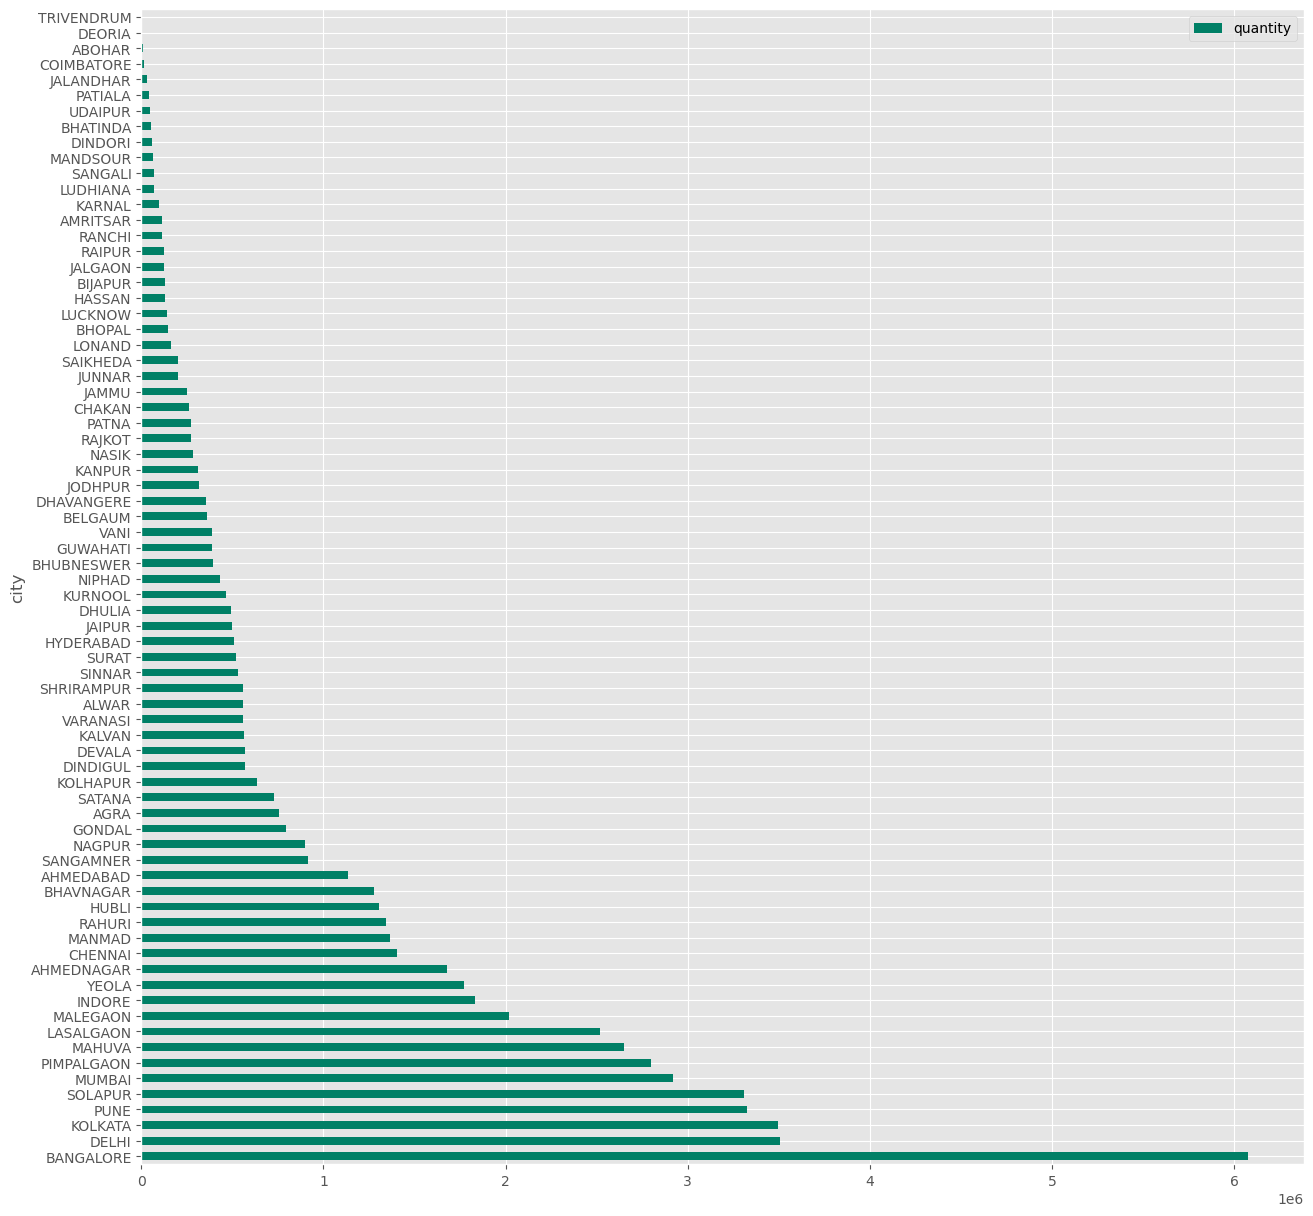

In [ ]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 15)
df2010City.plot(kind ="barh", x = 'city', y = 'quantity', colormap='summer')

### Задание 2. Найти штат с наибольшими продажами в 2015 году

In [ ]:
### your code here

### Задание 3. Вывести график кол-ва продаж в штате MS по всем городам в 2015 году

In [ ]:
### your code here

### Задание 4. Растет ли разброс цен в Бангалоре с годами?

In [ ]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,2005-01-01
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,2006-01-01
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,2010-01-01
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,2011-01-01
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,2012-01-01


In [ ]:
dfBang = df[df.city == 'BANGALORE']

In [ ]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
717,BANGALORE,January,2005,335679,470,597,522,KNT,BANGALORE,2005-01-01
718,BANGALORE,January,2006,412185,286,617,537,KNT,BANGALORE,2006-01-01
719,BANGALORE,January,2007,268268,586,1167,942,KNT,BANGALORE,2007-01-01
720,BANGALORE,January,2008,393806,174,671,472,KNT,BANGALORE,2008-01-01


In [ ]:
dfBang.describe()

,year,quantity,priceMin,priceMax,priceMod
count,146.00,146.00,146.00,146.00,146.00
mean,2009.59,523917.42,557.54,1313.88,1043.55
std,3.52,302369.03,381.42,911.10,667.51
min,2004.00,63824.00,145.00,338.00,320.00
25%,2007.00,329690.00,307.00,685.00,551.00
50%,2010.00,403530.50,448.00,1019.00,836.00
75%,2013.00,661252.00,653.00,1636.00,1325.50
max,2016.00,1639032.00,2377.00,4698.00,3430.00


#### Установим Index как date

In [ ]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
717,BANGALORE,January,2005,335679,470,597,522,KNT,BANGALORE,2005-01-01
718,BANGALORE,January,2006,412185,286,617,537,KNT,BANGALORE,2006-01-01
719,BANGALORE,January,2007,268268,586,1167,942,KNT,BANGALORE,2007-01-01
720,BANGALORE,January,2008,393806,174,671,472,KNT,BANGALORE,2008-01-01


In [ ]:
dfBang.index

Int64Index([716, 717, 718, 719, 720, 721, 722, 723, 724, 725,
            ...
            852, 853, 854, 855, 856, 857, 858, 859, 860, 861],
           dtype='int64', length=146)

In [ ]:
# Упорядочим по датам
dfBang = dfBang.sort_values(by = "date")
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
716,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
729,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
742,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
754,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
766,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [ ]:
# Установим index
dfBang.index = pd.PeriodIndex(dfBang.date, freq='M')

In [ ]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


#### Нарисуем графики

<AxesSubplot:xlabel='date'>

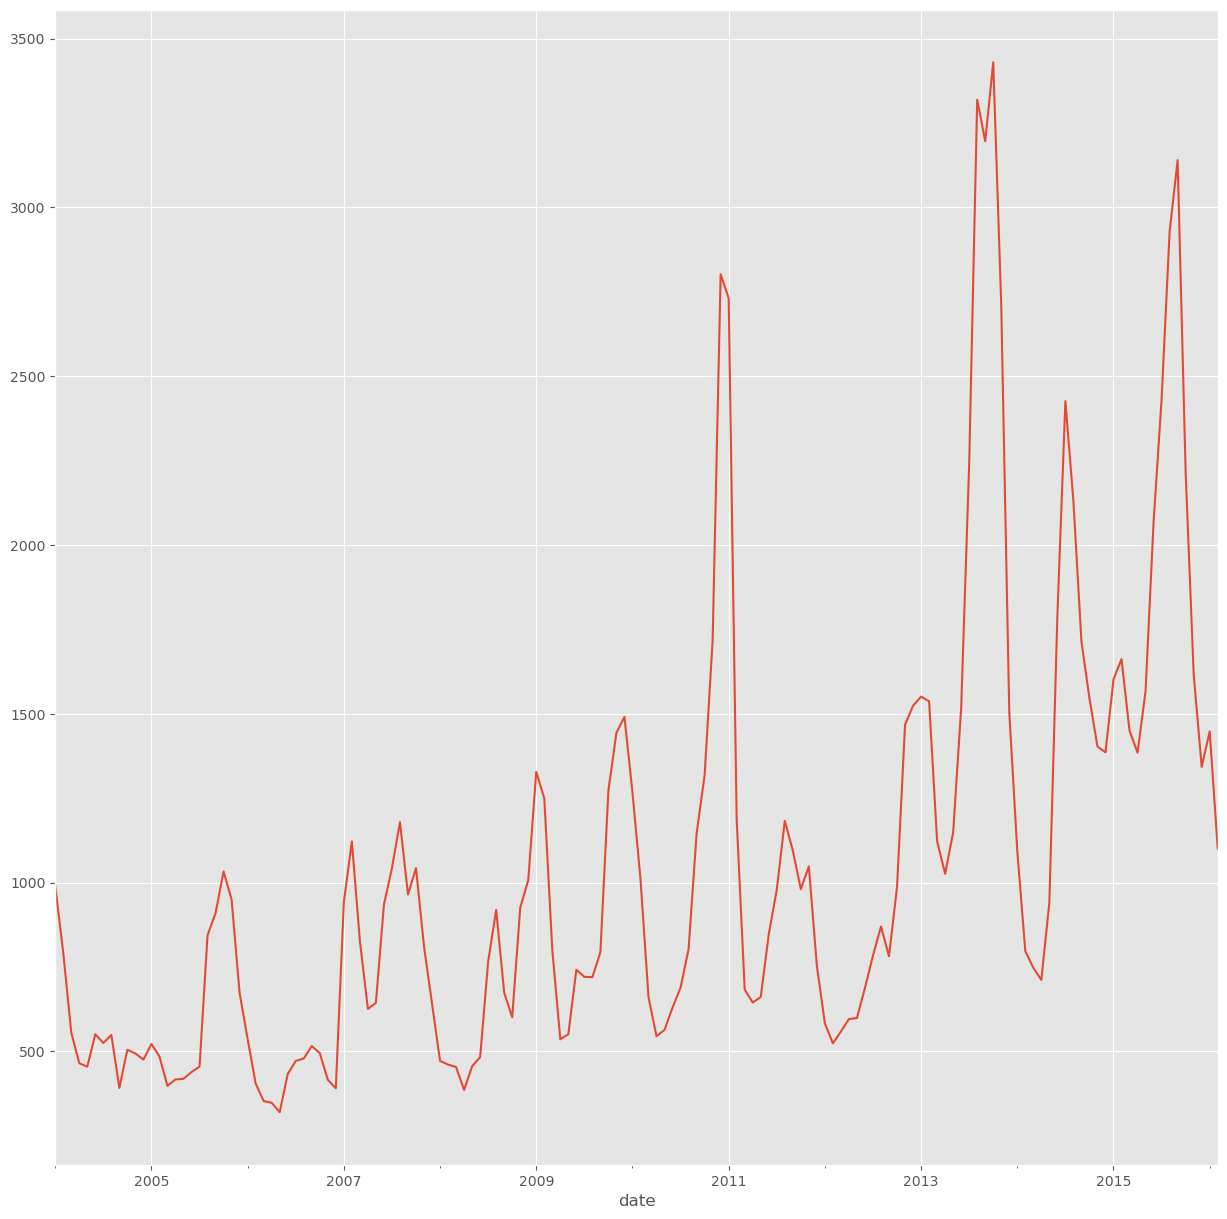

In [ ]:
dfBang.priceMod.plot()

Мы получили временной ряд !

<AxesSubplot:xlabel='date'>

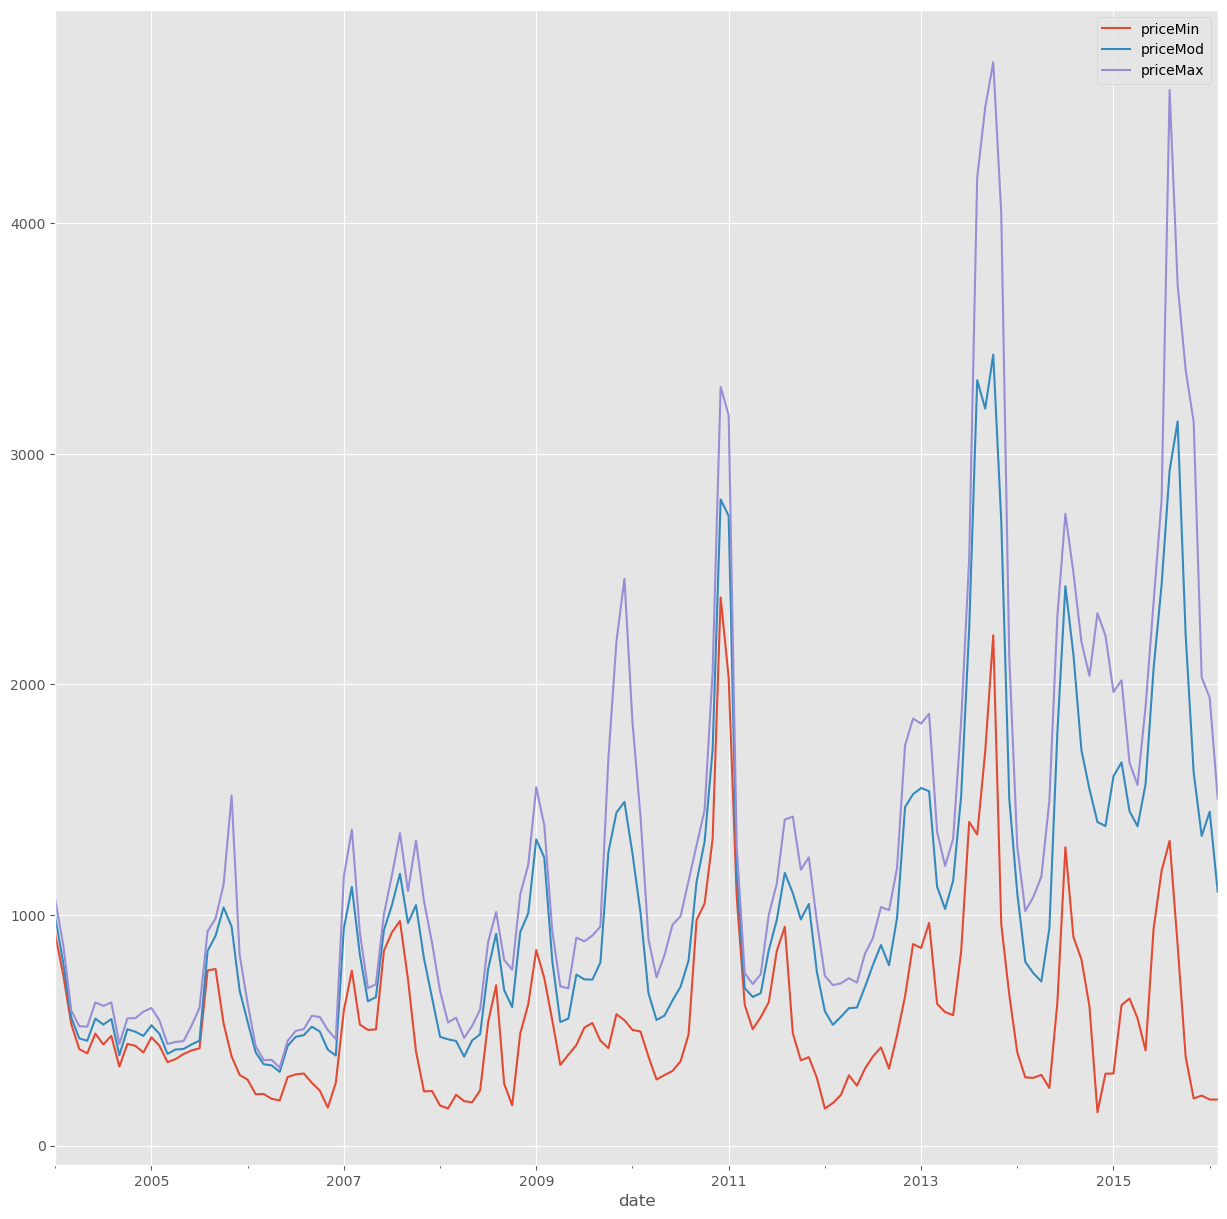

In [ ]:
dfBang.plot(kind = "line", y = ['priceMin', 'priceMod', 'priceMax'])

Мы получили сразу 3 временных ряда на одних осях !

Для расчета изменения создадим новый атрибут с разницей priceMax и priceMin  

In [ ]:
dfBang['priceDiff'] = dfBang['priceMax'] - dfBang['priceMin']

In [ ]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date,priceDiff
date,,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01,150
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01,129
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01,59
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01,99
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01,116


Выведем график priceDiff

<AxesSubplot:xlabel='date'>

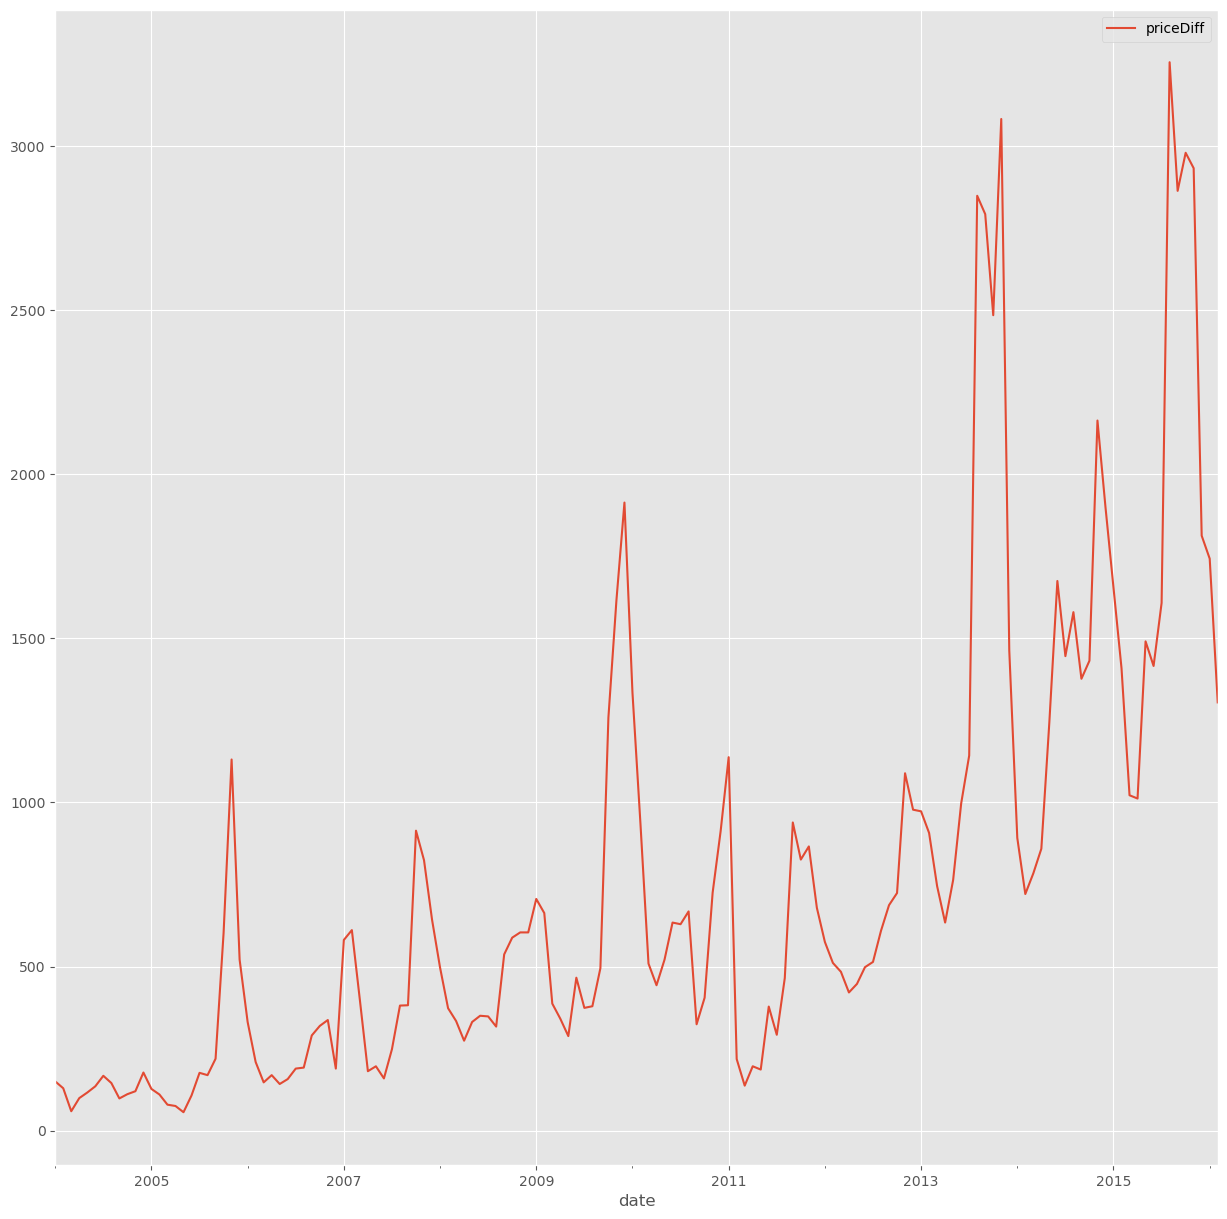

In [ ]:
dfBang.plot(kind = 'line', y = 'priceDiff')

## Раздел 2. Работа со сводными таблицами (pivot table)

Возможность создавать сводные таблицы присутствует в электронных таблицах и других программах, оперирующих табличными данными.
Сводная таблица принимает на входе данные из отдельных столбцов и группирует их, формируя двумерную таблицу, реализующую многомерное обобщение данных.
Чтобы ощутить разницу между сводной таблицей и операцией GroupBy, можно представить себе сводную таблицу, как многомерный вариант агрегации посредством GroupBy. То есть данные разделяются, преобразуются и объединяются, но при этом разделение и объединение осуществляются не по одномерному индексу, а по двумерной сетке.


![](https://pandas.pydata.org/pandas-docs/stable/_images/reshaping_pivot.png)


In [ ]:
# Создадим новый столбец для значения Месяц
dfBang['monthVal'] = pd.DatetimeIndex(dfBang['date']).month

In [ ]:
dfBang.head()

Cоздадим сводную таблицу по priceDiff (строки - monthval, столбцы - year)

In [ ]:
dfBangPivot = pd.pivot_table(dfBang, values = "priceDiff", 
                             columns = "year", index = "monthVal")

In [ ]:
dfBangPivot

In [ ]:
plt.style.use('ggplot')
dfBangPivot.plot()

### Задание 5. Вывести сводную таблицу с quantity по штатам и годам

In [ ]:
### your code here

## Раздел 3. Прогнозирование временного ряда

### План
#### 3. Прогнозирование временного ряда
#### 3.1 Прогнозирование средним (Mean Constant Model)
#### 3.2. Линейная модель (Linear Trend Model)
#### 3.3. Линейная модель с регрессией (Linear Regression Model)
#### 4. Выделение тренда и сезонности
#### 5. Стационарность ряда
#### 6. ARIMA

### Подготовка данных

In [ ]:
# Отсортируем и добавим date в индекс
df.index = pd.PeriodIndex(df.date, freq='M')
df.index.rename('date_ind', inplace = True)
df = df.sort_values(by = "date")

In [ ]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date_ind,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


Будем работать с данными в городе Бангалор

In [ ]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [ ]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date_ind,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [ ]:
# Удалим лишние столбцы
dfBang = dfBang.drop(["market", "month", "year", "state", "city", "priceMin", "priceMax"], axis = 1)

In [ ]:
dfBang.shape

(146, 3)

In [ ]:
dfBang.head()

,quantity,priceMod,date
date_ind,,,
2004-01,227832,991,2004-01-01
2004-02,225133,793,2004-02-01
2004-03,221952,556,2004-03-01
2004-04,185150,465,2004-04-01
2004-05,137390,455,2004-05-01


<AxesSubplot:xlabel='date_ind'>

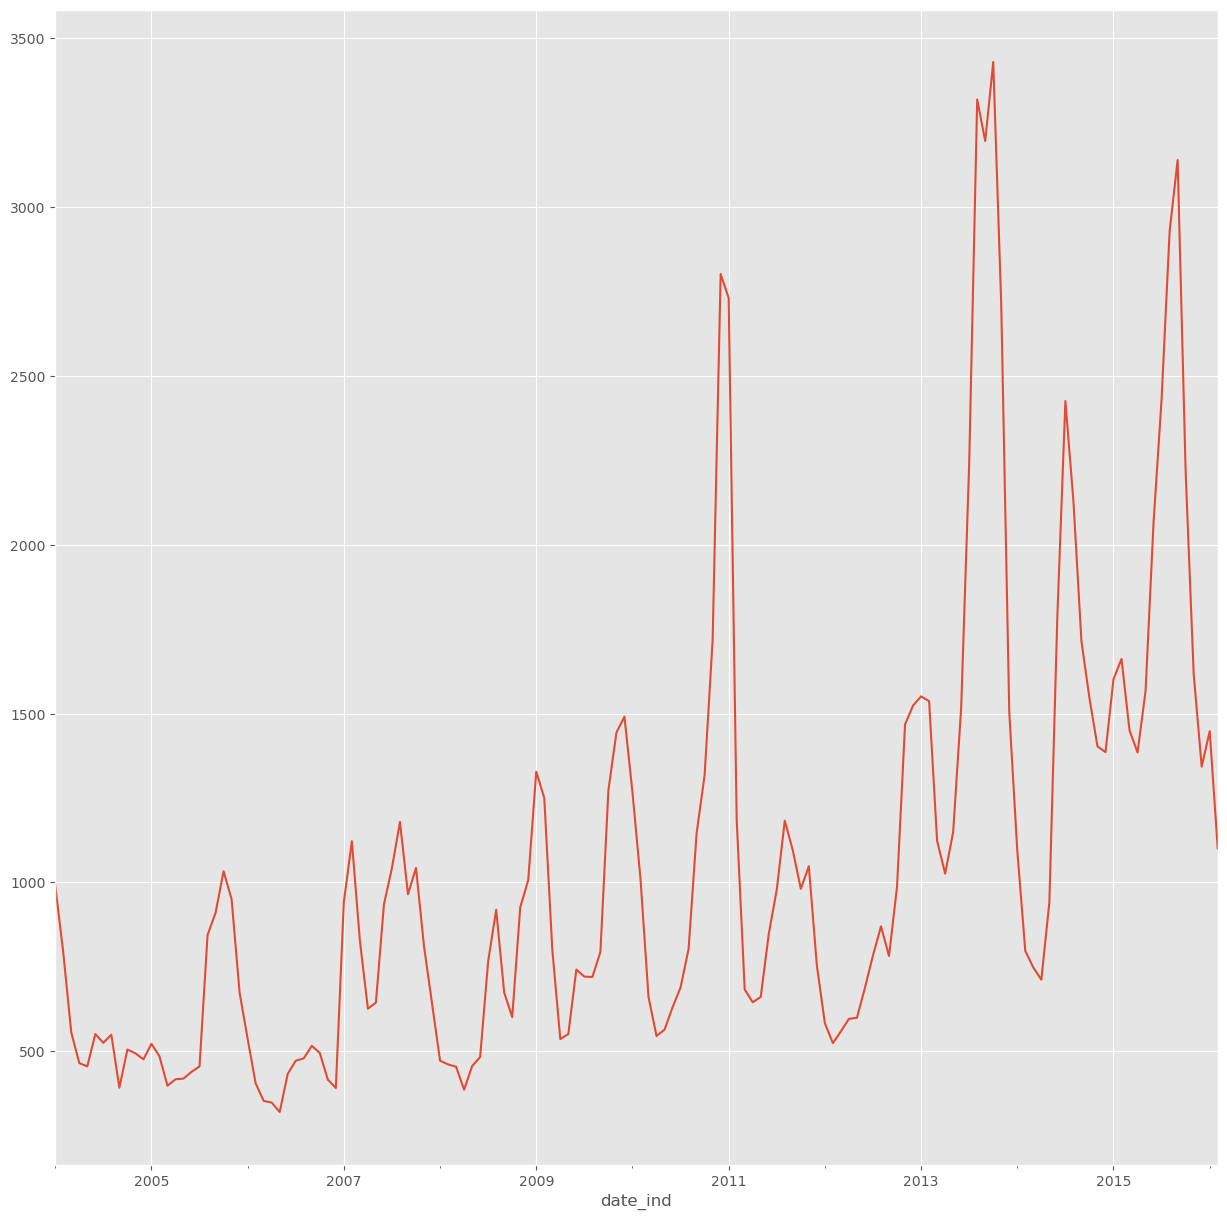

In [ ]:
dfBang.priceMod.plot()

<AxesSubplot:xlabel='date_ind'>

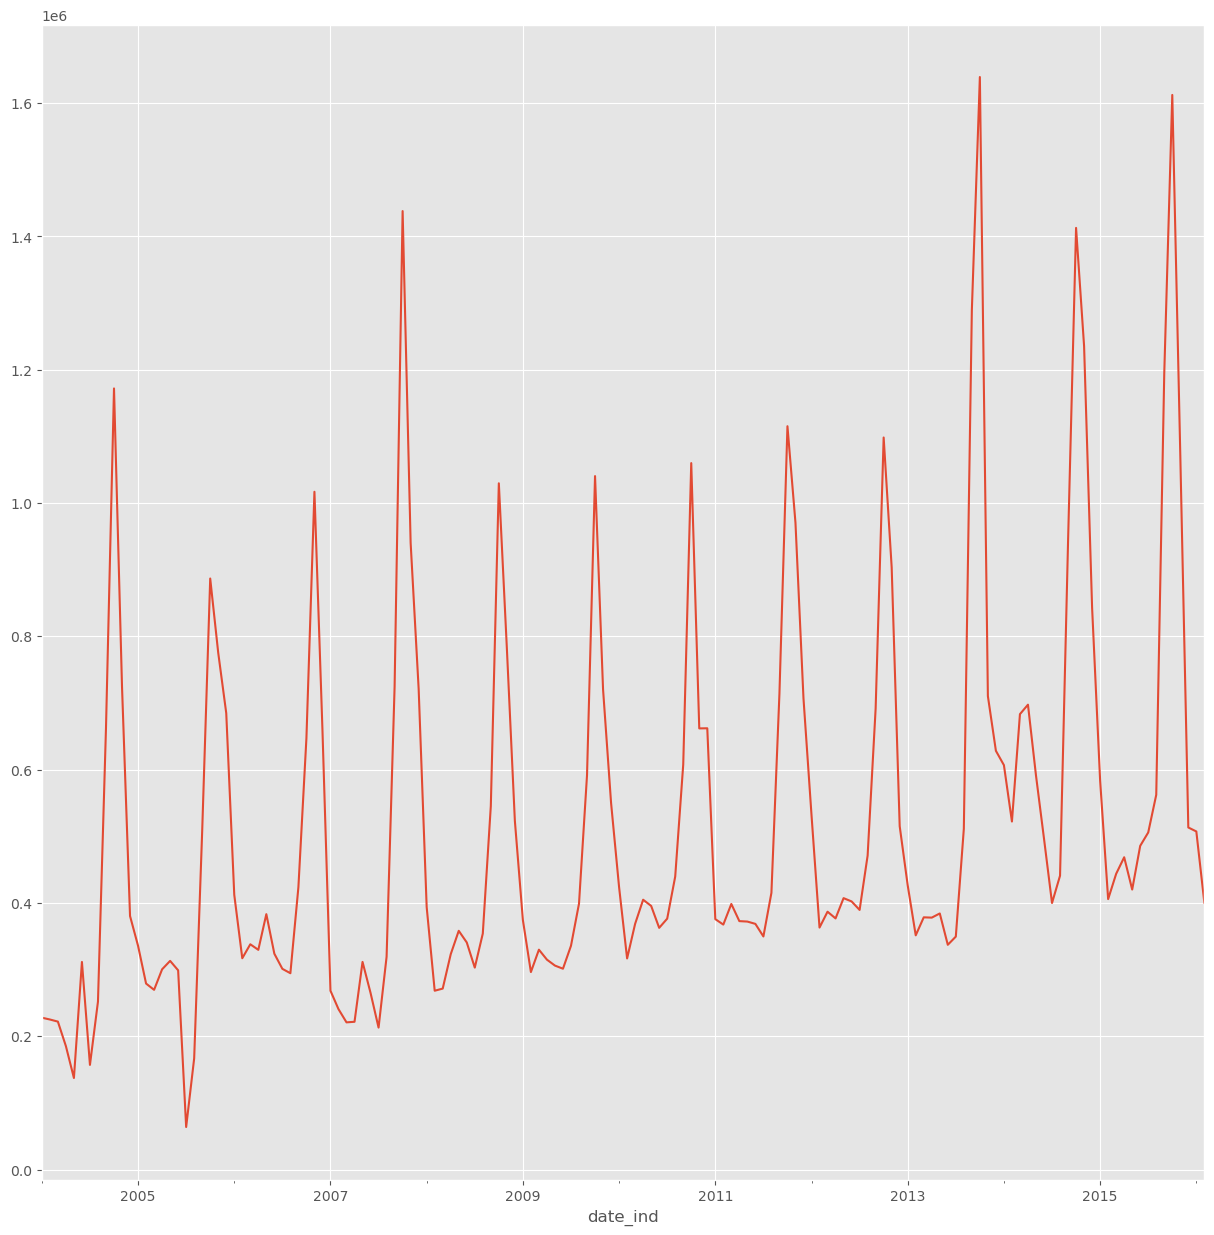

In [ ]:
dfBang.quantity.plot()

### Логарифмическое преобразование данных
Логарифмирование помогает стабилизировать разброс значений.

<AxesSubplot:ylabel='Frequency'>

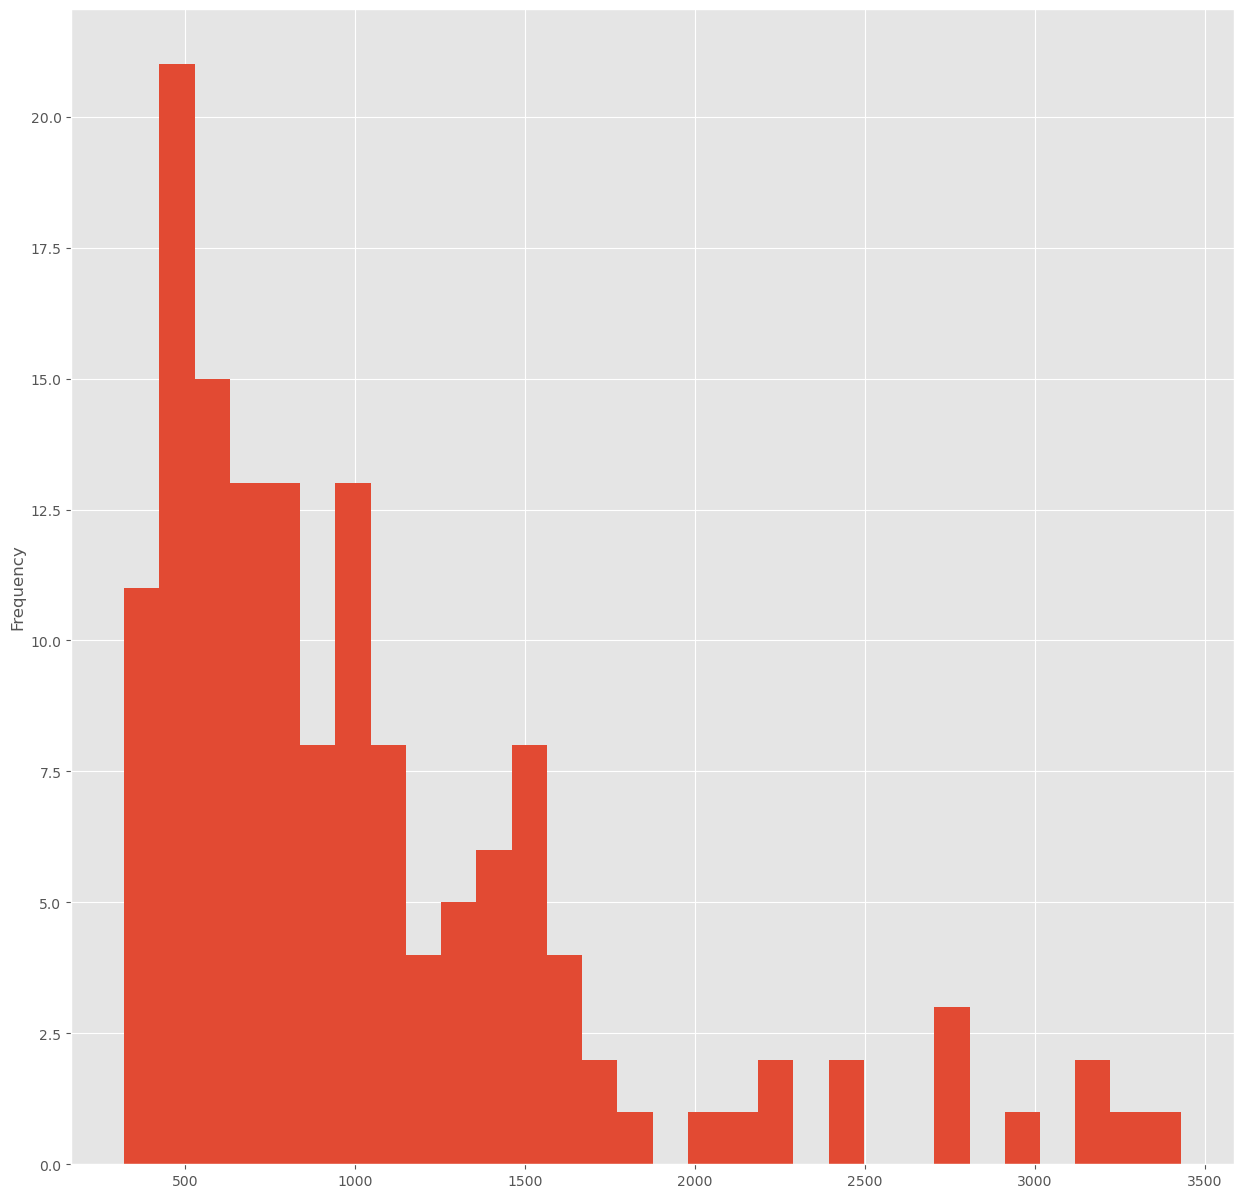

In [ ]:
dfBang.priceMod.plot(kind = "hist", bins = 30)

При визуализации можем заметить, что есть данные, далеко отстающие от среднего значения, что может искажать модель регрессии. Наша задача минимизировать влияние таких данных. Желательно не исключая их.  
В этом случае самый распространенный вариант действия - логарифмирование переменной.

In [ ]:
dfBang['priceModLog'] = np.log(dfBang.priceMod)
dfBang.head()

,quantity,priceMod,date,priceModLog
date_ind,,,,
2004-01,227832,991,2004-01-01,6.90
2004-02,225133,793,2004-02-01,6.68
2004-03,221952,556,2004-03-01,6.32
2004-04,185150,465,2004-04-01,6.14
2004-05,137390,455,2004-05-01,6.12


<AxesSubplot:ylabel='Frequency'>

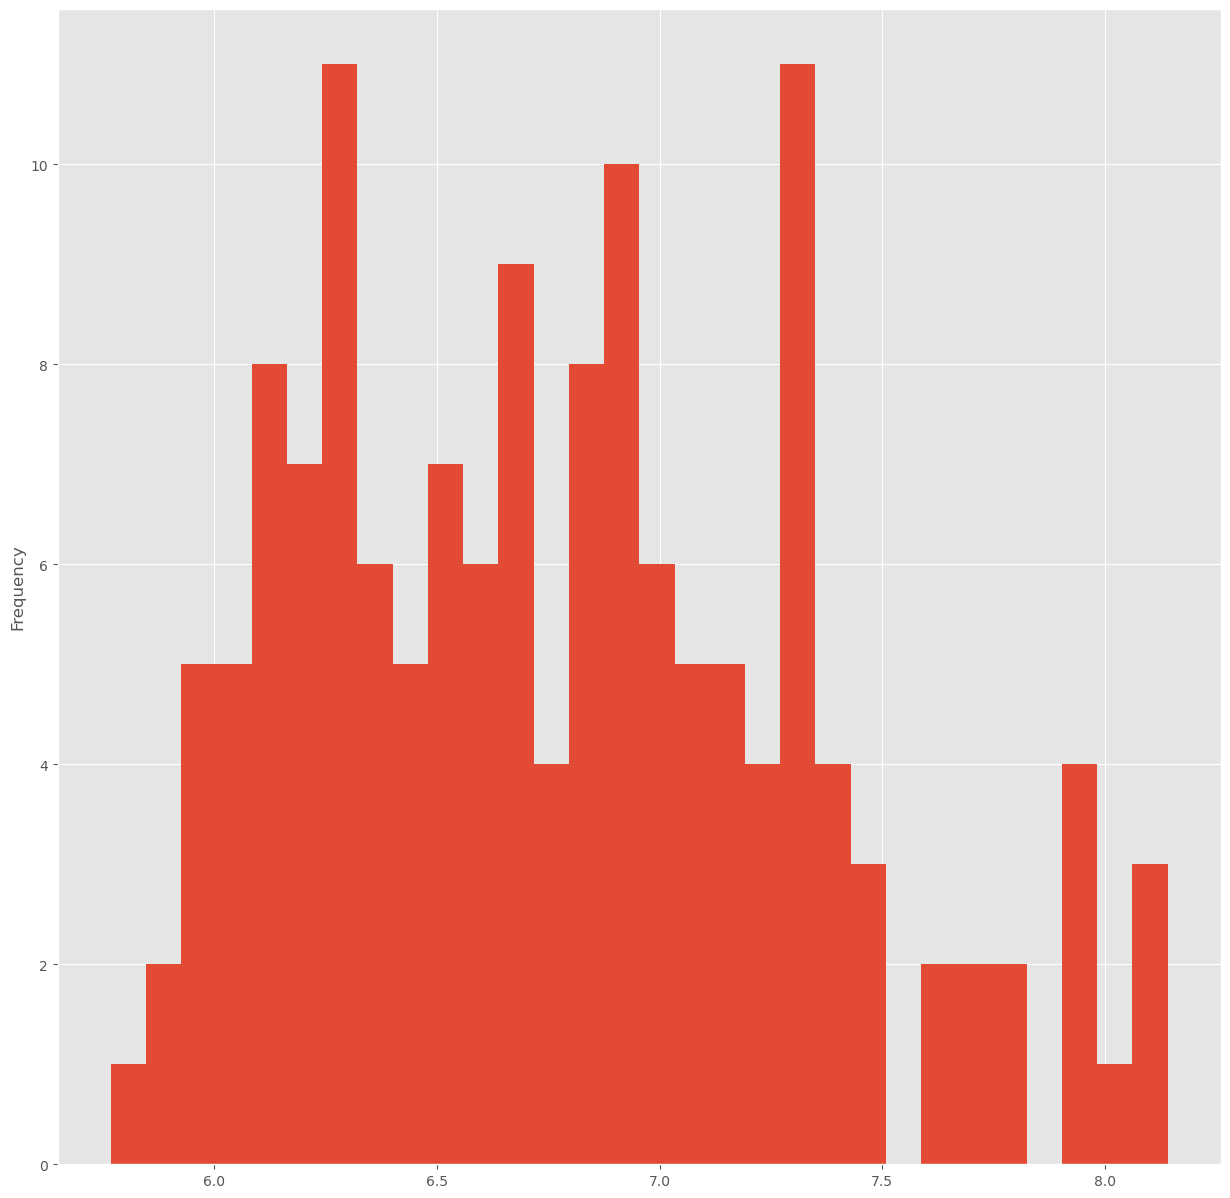

In [ ]:
dfBang.priceModLog.plot(kind = "hist", bins = 30)

<AxesSubplot:xlabel='date_ind'>

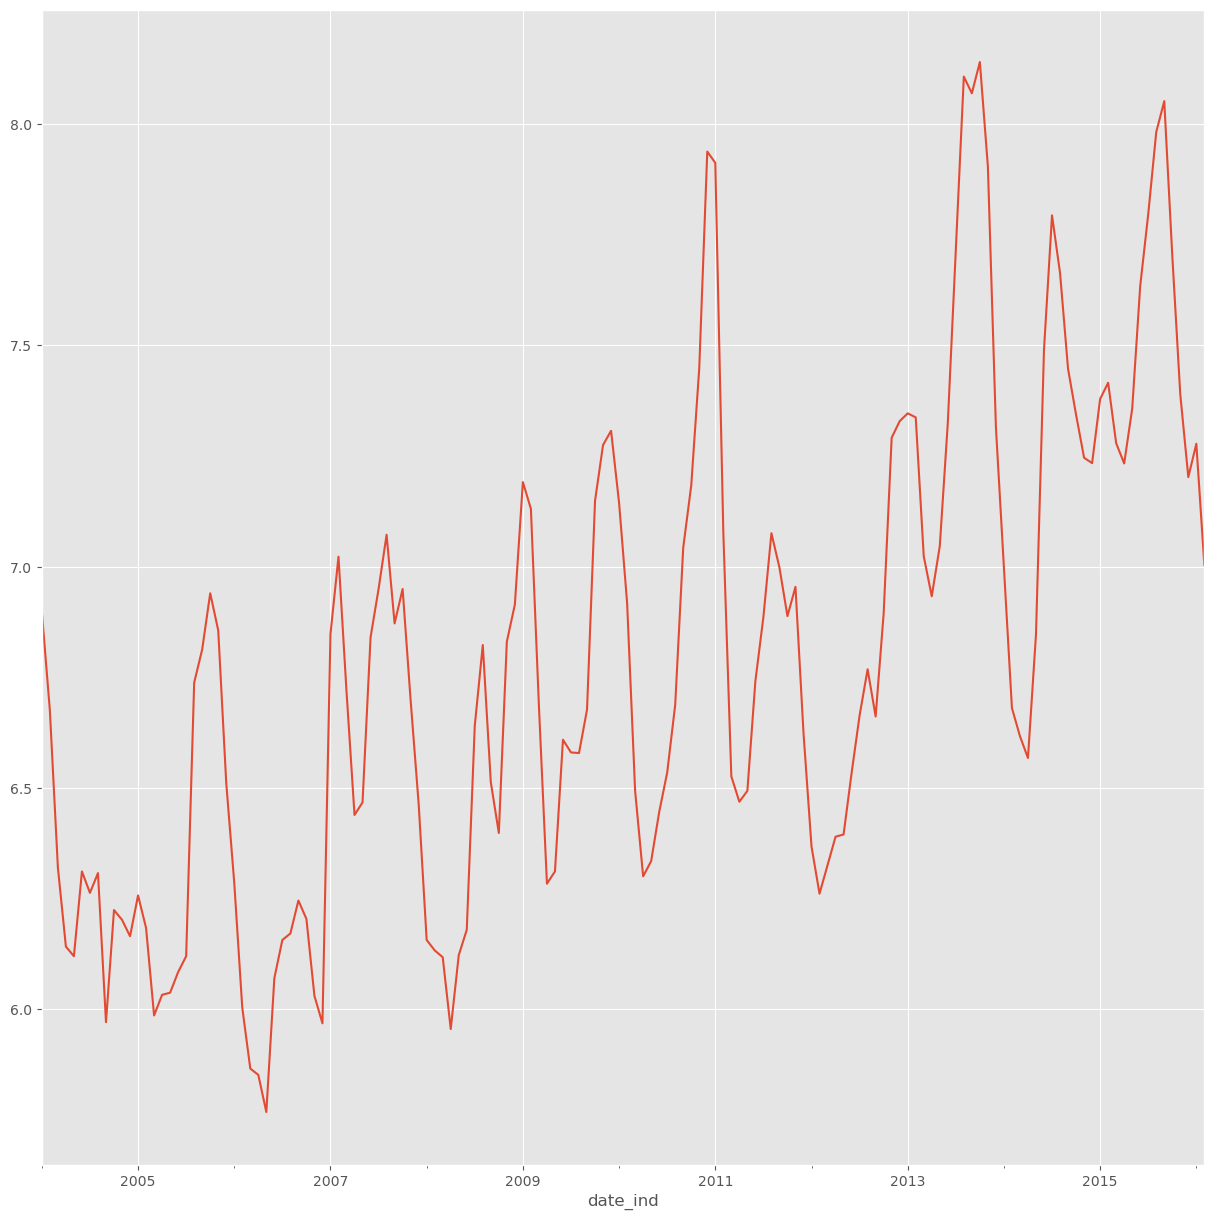

In [ ]:
dfBang.priceModLog.plot()

## 3.1. Прогнозирование средним 

In [ ]:
model_mean_pred = dfBang.priceModLog.mean()

In [ ]:
# Запишем это значение в priceMean
dfBang["priceMean"] = np.exp(model_mean_pred)

<AxesSubplot:xlabel='date'>

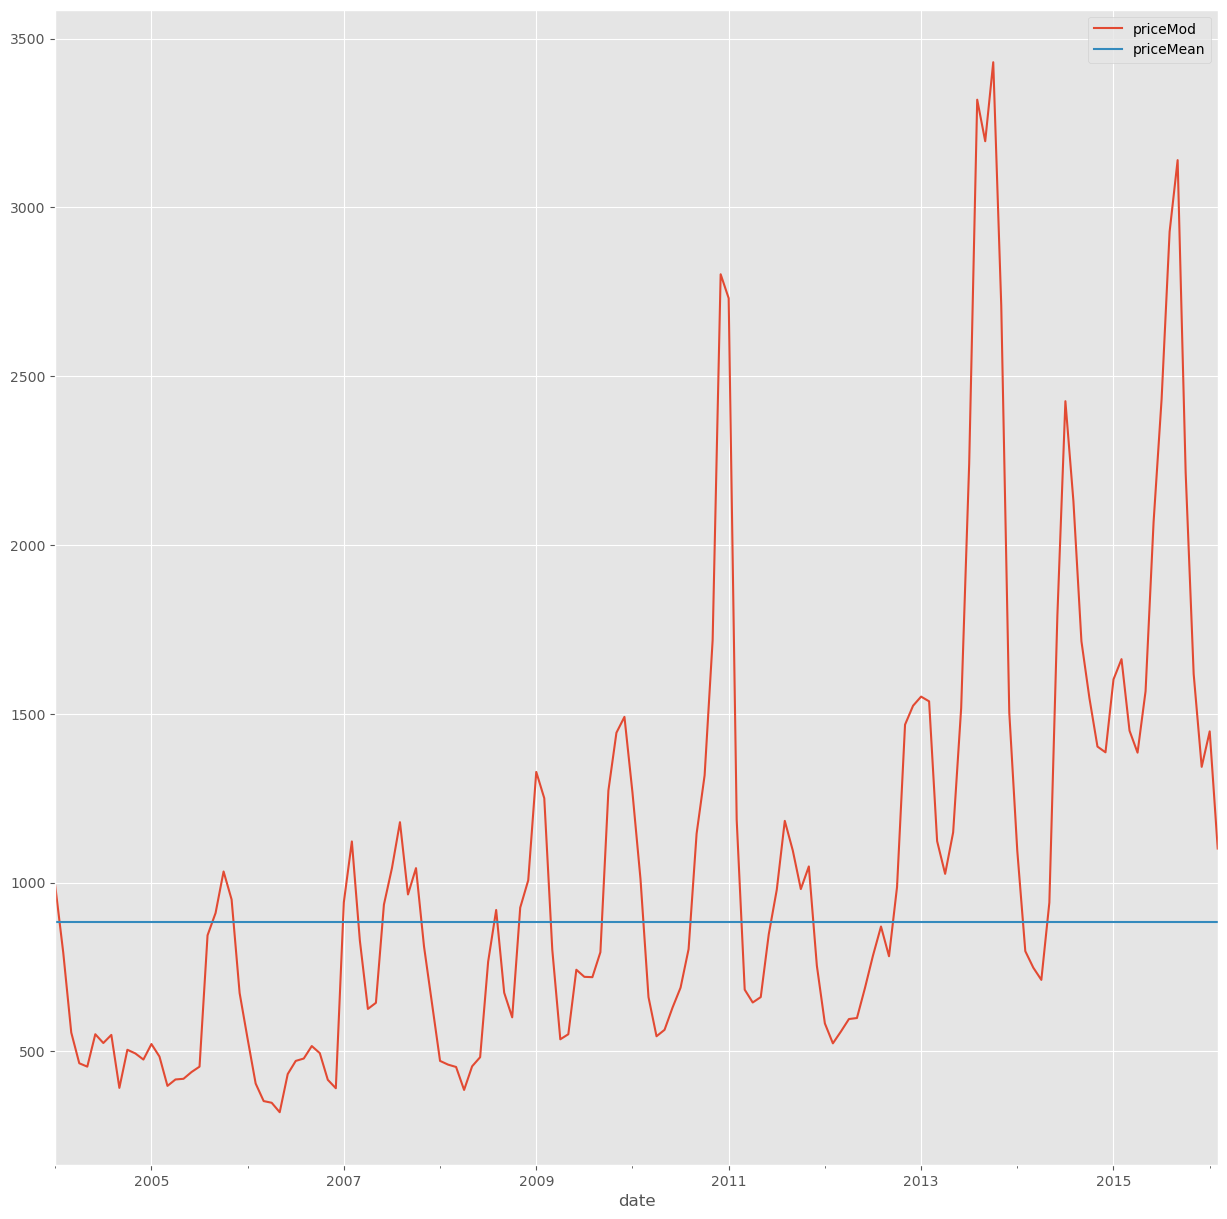

In [ ]:
dfBang.plot(kind="line", x= 'date', y = ["priceMod", "priceMean"])

**Как мерить качество?**

Чтобы обучать регрессионные модели, нужно определиться, как именно измеряется качество предсказаний.   
Будем использовать метрику RMSE (Root Mean Squared Error) - корень среднего квадрата отклонения.

$$RMSE =  \sqrt{ \Sigma (\hat{y} - y)^2/n} $$ , 
где $\hat{y}$ это предсказанное значение y

In [ ]:
def RMSE(predicted, actual):
    mse = (predicted - actual)**2
    rmse = np.sqrt(mse.sum()/mse.count())
    return rmse

In [ ]:
model_mean_RMSE = RMSE(dfBang.priceMean, dfBang.priceMod)
model_mean_RMSE

683.9533483996255

In [ ]:
dfBangResults = pd.DataFrame(columns = ["Model", "RMSE"])
dfBangResults.head()

,Model,RMSE


In [ ]:
dfBangResults.loc[0,"Model"] = "Mean"
dfBangResults.loc[0,"RMSE"] = model_mean_RMSE
dfBangResults.head()

,Model,RMSE
0,Mean,683.95


### Задание 6. Постройте модель средних для величины quantity

In [ ]:
## your code here

[link text](https://)## 3.2. Линейная модель

Построим линейную зависиммость между priceModLog and time.   
Уравнение регрессии строится с помощью метода наимменьших квадратов.

In [ ]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean
date_ind,,,,,
2004-01,227832,991,2004-01-01,6.90,884.57
2004-02,225133,793,2004-02-01,6.68,884.57
2004-03,221952,556,2004-03-01,6.32,884.57
2004-04,185150,465,2004-04-01,6.14,884.57
2004-05,137390,455,2004-05-01,6.12,884.57


In [ ]:
dfBang.dtypes

quantity                int64
priceMod                int64
date           datetime64[ns]
priceModLog           float64
priceMean             float64
dtype: object

In [ ]:
dfBang.date.min()

Timestamp('2004-01-01 00:00:00')

In [ ]:
dfBang["timeIndex"] = dfBang.date - dfBang.date.min()

In [ ]:
dfBang.dtypes

quantity                 int64
priceMod                 int64
date            datetime64[ns]
priceModLog            float64
priceMean              float64
timeIndex      timedelta64[ns]
dtype: object

In [ ]:
dfBang["timeIndex"] =  dfBang["timeIndex"]/np.timedelta64(1, 'M')

In [ ]:
dfBang["timeIndex"] = dfBang["timeIndex"].round(0).astype(int)

In [ ]:
dfBang.timeIndex.tail()

date_ind
2015-10    141
2015-11    142
2015-12    143
2016-01    144
2016-02    145
Freq: M, Name: timeIndex, dtype: int32

In [ ]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex
date_ind,,,,,,
2004-01,227832,991,2004-01-01,6.90,884.57,0
2004-02,225133,793,2004-02-01,6.68,884.57,1
2004-03,221952,556,2004-03-01,6.32,884.57,2
2004-04,185150,465,2004-04-01,6.14,884.57,3
2004-05,137390,455,2004-05-01,6.12,884.57,4


In [ ]:
model_linear = smf.ols('priceModLog ~ timeIndex', data = dfBang).fit()

In [ ]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            priceModLog   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     139.8
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           5.75e-23
Time:                        19:56:56   Log-Likelihood:                -72.317
No. Observations:                 146   AIC:                             148.6
Df Residuals:                     144   BIC:                             154.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1121      0.066     92.830      0.000       5.982       6.242
timeIndex      0.0093      0.001     11.823      0.000       0.008       0.011
==============================================================================
Omnibus:                        4.750   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.739
Skew:                           0.405   Prob(JB):                       0.0935
Kurtosis:                       2.648   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Выведем параметры нашей линейной модели

In [ ]:
model_linear.params

Intercept   6.11
timeIndex   0.01
dtype: float64

In [ ]:
c = model_linear.params[0]
c

6.112108132763634

In [ ]:
m = model_linear.params[1]
m

0.009282603918039894

In [ ]:
model_linear_pred = model_linear.predict()

In [ ]:
model_linear_pred

array([6.11210813, 6.12139074, 6.13067334, 6.13995594, 6.14923855,
       6.15852115, 6.16780376, 6.17708636, 6.18636896, 6.19565157,
       6.20493417, 6.21421678, 6.22349938, 6.23278198, 6.24206459,
       6.25134719, 6.2606298 , 6.2699124 , 6.279195  , 6.28847761,
       6.29776021, 6.30704282, 6.31632542, 6.32560802, 6.33489063,
       6.34417323, 6.35345583, 6.36273844, 6.37202104, 6.38130365,
       6.39058625, 6.39986885, 6.40915146, 6.41843406, 6.42771667,
       6.43699927, 6.44628187, 6.45556448, 6.46484708, 6.47412969,
       6.48341229, 6.49269489, 6.5019775 , 6.5112601 , 6.52054271,
       6.52982531, 6.53910791, 6.54839052, 6.55767312, 6.56695572,
       6.57623833, 6.58552093, 6.59480354, 6.60408614, 6.61336874,
       6.62265135, 6.63193395, 6.64121656, 6.65049916, 6.65978176,
       6.66906437, 6.67834697, 6.68762958, 6.69691218, 6.70619478,
       6.71547739, 6.72475999, 6.7340426 , 6.7433252 , 6.7526078 ,
       6.76189041, 6.77117301, 6.78045561, 6.78973822, 6.79902

In [ ]:
dfBang["priceLinear"] = np.exp(model_linear_pred)

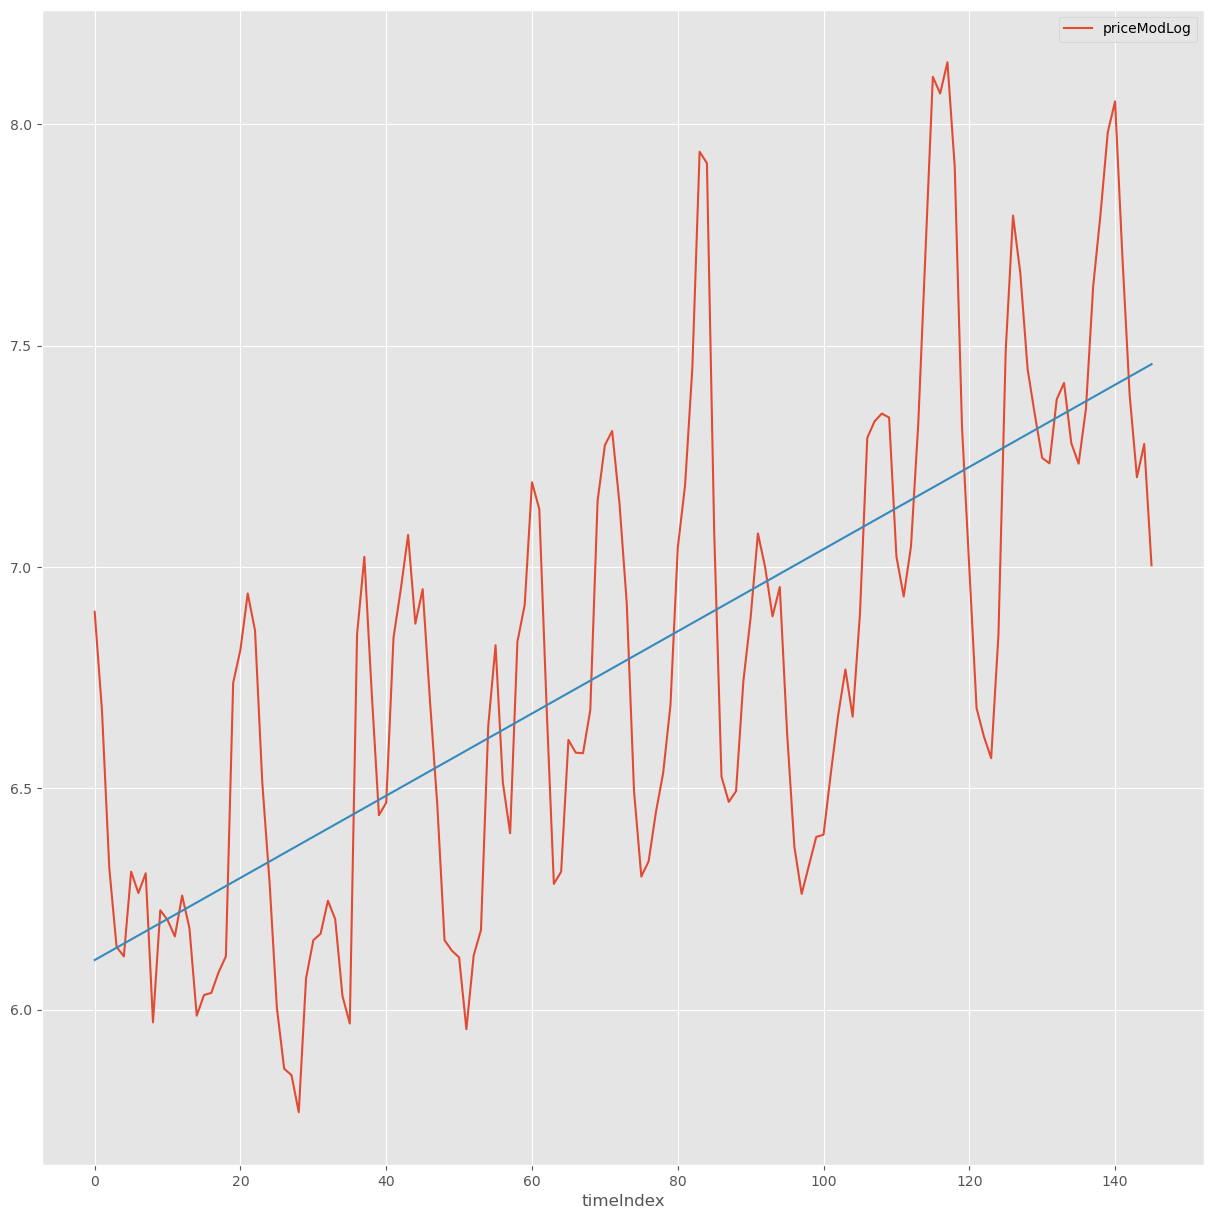

In [ ]:
dfBang.plot(kind="line", x="timeIndex", y = "priceModLog")
plt.plot(dfBang.timeIndex,model_linear_pred, '-')

<AxesSubplot:xlabel='date_ind'>

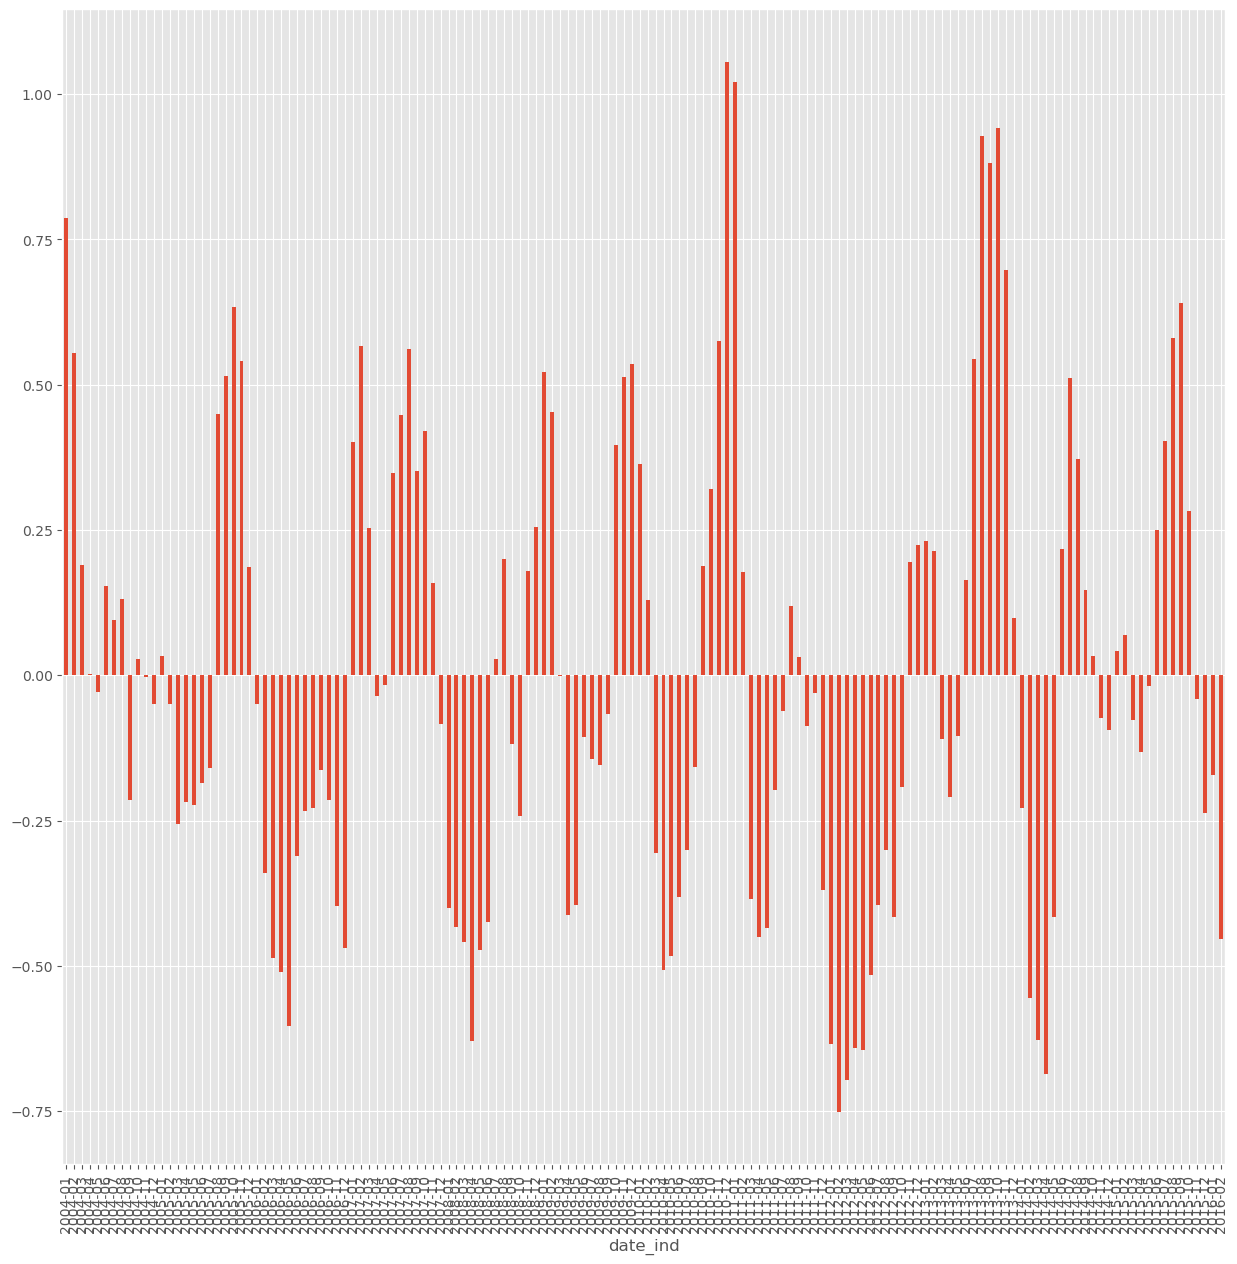

In [ ]:
model_linear.resid.plot(kind = "bar")

Посчитаем ошибку RMSE на линейной модели:

In [ ]:
model_linear_RMSE = RMSE(dfBang.priceLinear, dfBang.priceMod)
model_linear_RMSE

518.5236075841477

In [ ]:
dfBangResults.loc[1,"Model"] = "Linear"
dfBangResults.loc[1,"RMSE"] = model_linear_RMSE
dfBangResults.head()

,Model,RMSE
0,Mean,683.95
1,Linear,518.52


### Задание 7. Постройте линейную модель для величины quantity

In [ ]:
### your code here

## 3.3 Линейная модель с регрессией

In [ ]:
dfBang.tail()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear
date_ind,,,,,,,
2015-10,1612160,2215,2015-10-01,7.70,884.57,141,1670.63
2015-11,1071872,1618,2015-11-01,7.39,884.57,142,1686.21
2015-12,513186,1343,2015-12-01,7.20,884.57,143,1701.93
2016-01,507223,1448,2016-01-01,7.28,884.57,144,1717.81
2016-02,400359,1101,2016-02-01,7.00,884.57,145,1733.83


In [ ]:
## Построим регрессию, используя несколько переменных timeIndex и np.log(quantity)
model_linear_quantity = smf.ols('priceModLog ~ timeIndex + np.log(quantity)', data = dfBang).fit()

In [ ]:
model_linear_quantity.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            priceModLog   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     74.16
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           8.00e-23
Time:                        19:57:06   Log-Likelihood:                -69.892
No. Observations:                 146   AIC:                             145.8
Df Residuals:                     143   BIC:                             154.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            4.1813      0.881      4.746      0.000       2.440       5.923
timeIndex            0.0084      0.001      9.774      0.000       0.007       0.010
np.log(quantity)     0.1529      0.070      2.198      0.030       0.015       0.290
==============================================================================
Omnibus:                        5.097   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.952
Skew:                           0.403   Prob(JB):                       0.0841
Kurtosis:                       2.593   Cond. No.                     2.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear
date_ind,,,,,,,
2004-01,227832,991,2004-01-01,6.90,884.57,0,451.29
2004-02,225133,793,2004-02-01,6.68,884.57,1,455.50
2004-03,221952,556,2004-03-01,6.32,884.57,2,459.75
2004-04,185150,465,2004-04-01,6.14,884.57,3,464.03
2004-05,137390,455,2004-05-01,6.12,884.57,4,468.36


In [ ]:
dfBang.tail()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear
date_ind,,,,,,,
2015-10,1612160,2215,2015-10-01,7.70,884.57,141,1670.63
2015-11,1071872,1618,2015-11-01,7.39,884.57,142,1686.21
2015-12,513186,1343,2015-12-01,7.20,884.57,143,1701.93
2016-01,507223,1448,2016-01-01,7.28,884.57,144,1717.81
2016-02,400359,1101,2016-02-01,7.00,884.57,145,1733.83


In [ ]:
model_linear_quantity.predict().shape

(146,)

In [ ]:
dfBang["priceLinearQuantity"] = np.exp(model_linear_quantity.predict())

In [ ]:
model_linear_q_pred = model_linear_quantity.predict()

<AxesSubplot:xlabel='timeIndex'>

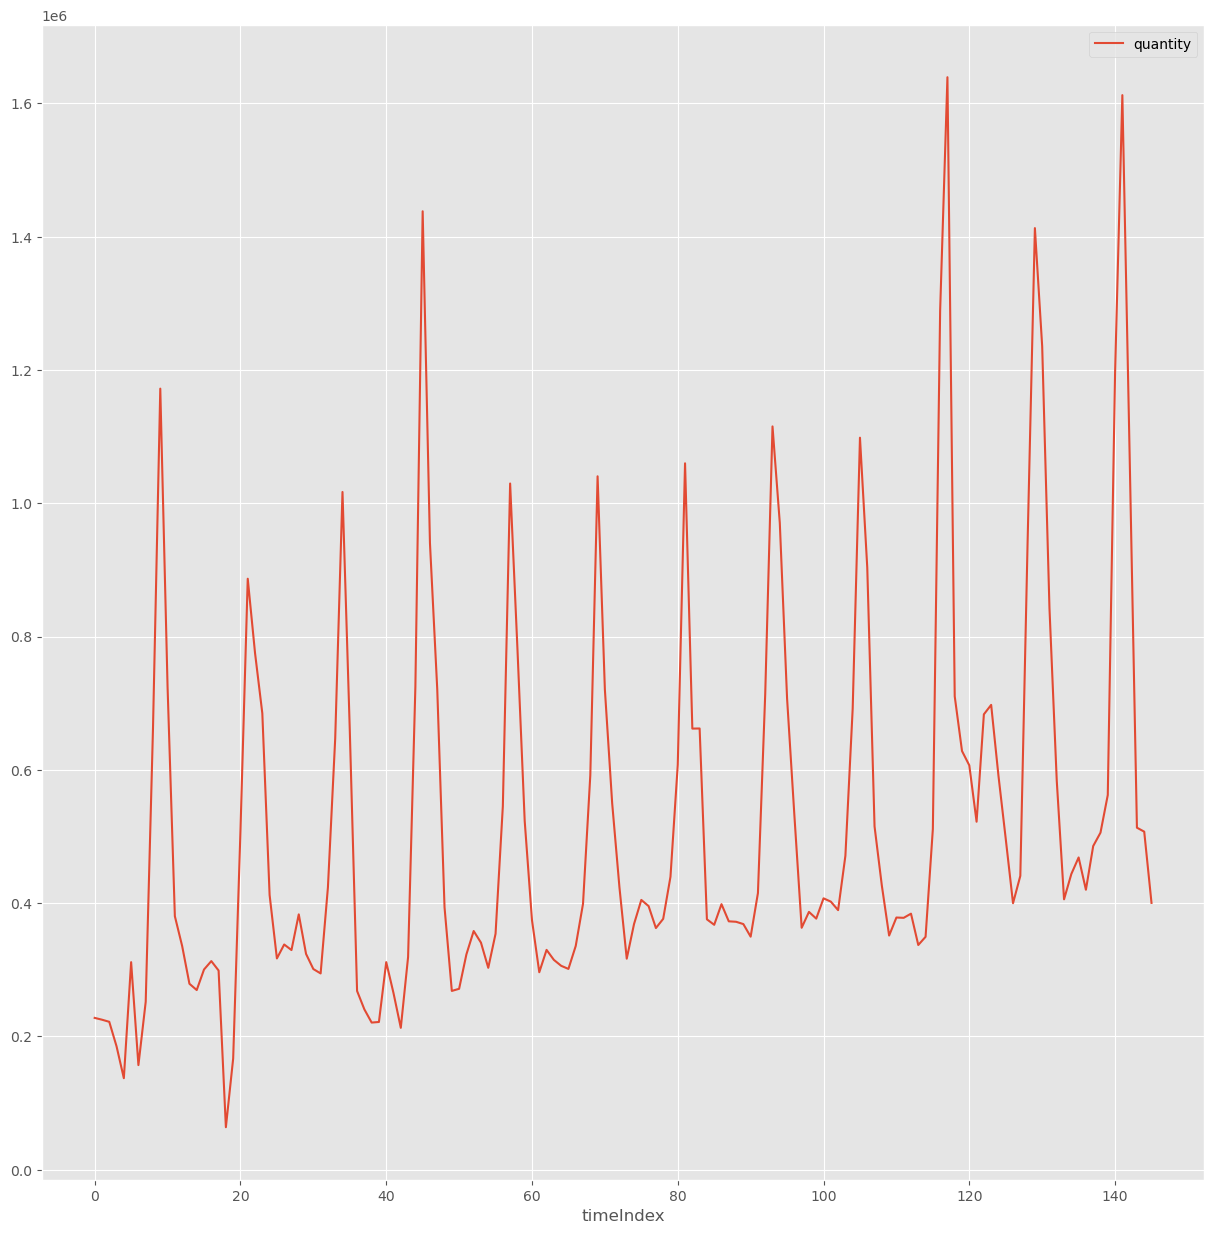

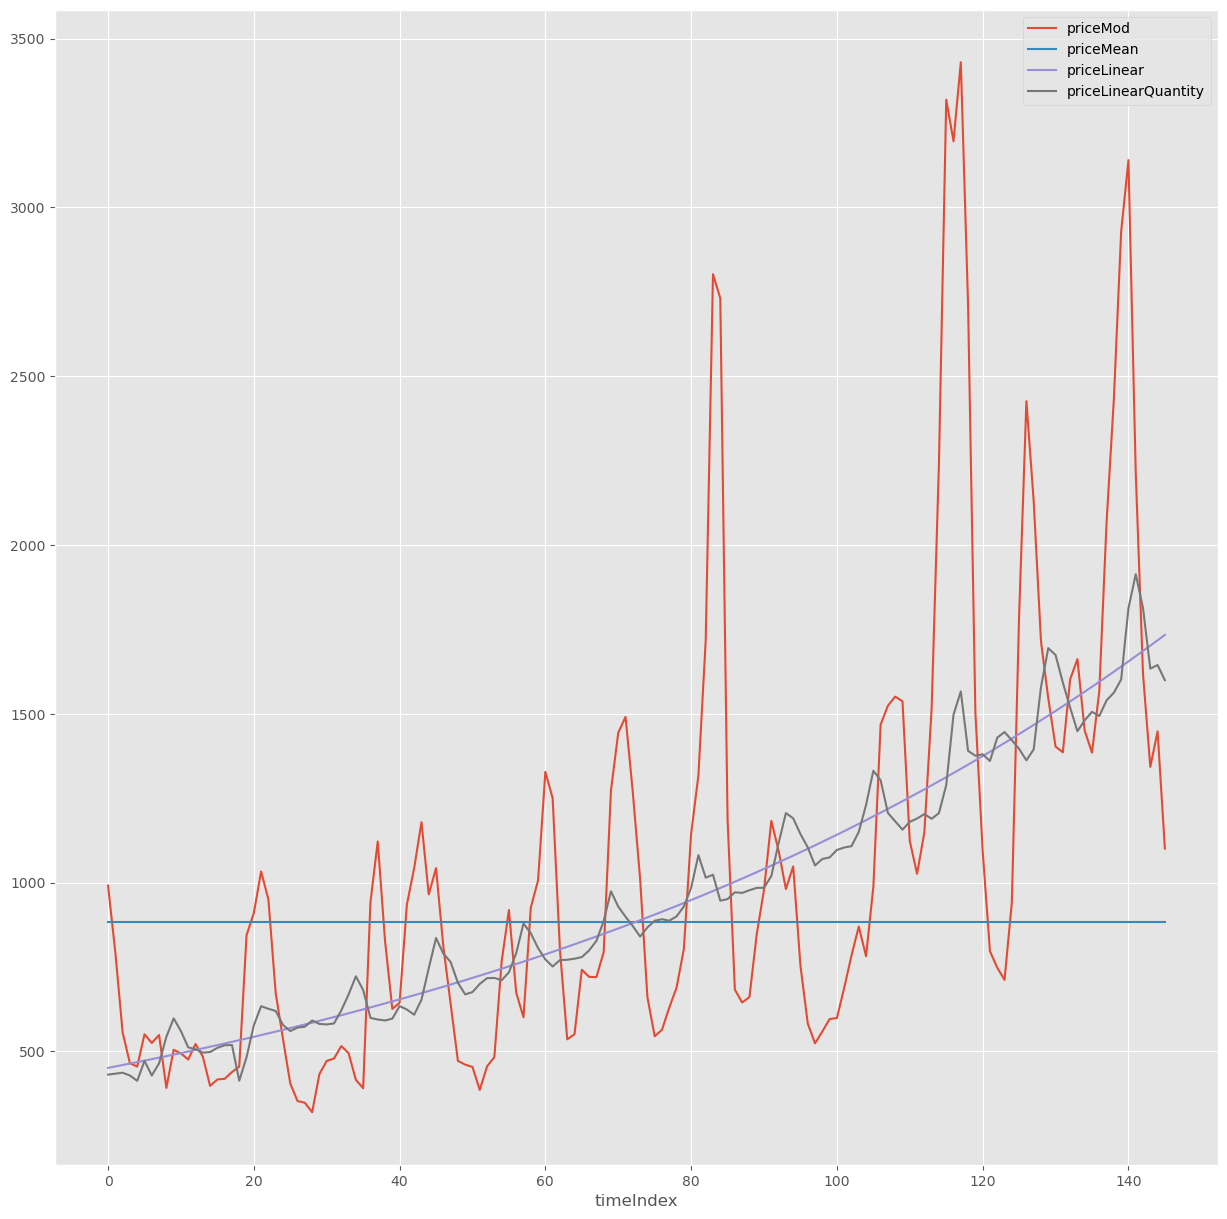

In [ ]:
dfBang.plot(kind = "line", x="timeIndex", y = "quantity")
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", 
                                             "priceLinear", "priceLinearQuantity"])

### Прогнозирование в будущее

Также мы можем обучить нашу модель на части выборки, чтобы осуществить прогноз в будущее. Для оставшихся данных в начале сделаем прогноз, затем оценим, насколько он был точный

In [ ]:
dfBang.tail()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceLinearQuantity
date_ind,,,,,,,,
2015-10,1612160,2215,2015-10-01,7.70,884.57,141,1670.63,1913.49
2015-11,1071872,1618,2015-11-01,7.39,884.57,142,1686.21,1812.99
2015-12,513186,1343,2015-12-01,7.20,884.57,143,1701.93,1633.68
2016-01,507223,1448,2016-01-01,7.28,884.57,144,1717.81,1644.59
2016-02,400359,1101,2016-02-01,7.00,884.57,145,1733.83,1599.63


In [ ]:

model_linear_quantity = smf.ols('Passengers_In ~ TimeIndex', data = d2.iloc[:-15, :]).fit()
model_linear_quantity.predict(d2.iloc[-15:, :])


NameError: ignored

In [ ]:
prediction = np.exp(model_linear_quantity.predict(dfBang.iloc[-15:, :]).values)

In [ ]:
plt.plot(dfBang.date[:-15], dfBang['priceMod'][:-15])
plt.plot(dfBang.date[-15:], prediction)

NameError: ignored

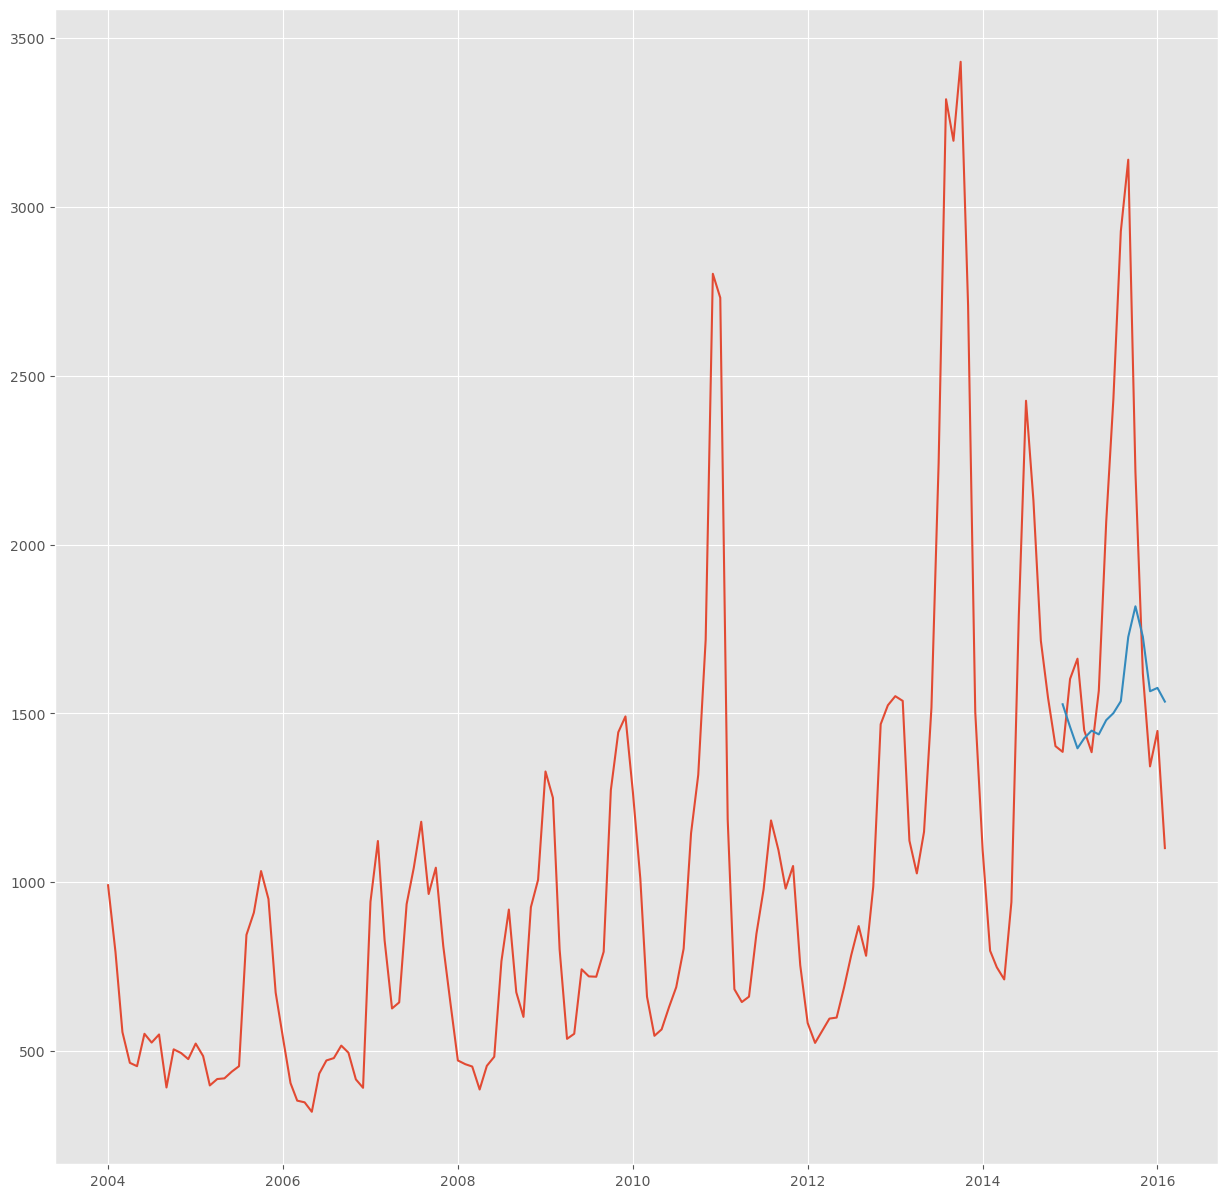

In [ ]:
plt.plot(dfBang.date, dfBang['priceMod'])
plt.plot(dfBang.date[-15:], prediction)

### Задание 8. Постройте линейную модель с регрессией для величины quantity

In [ ]:
### your code here

## 4. Выделение тренда и сезонности

При работе с временными рядами выделяют два действия:
- Дифференцирование - расчет разницы с определенным временным лагом
- Декомпозиция - моделирование как тренда, так и сезонности и удаление их из модели.

Предположим, что у вас имеются ежемесячные данные о пассажиропотоке на международных авиалиниях.  
Объем пассажиропотока имеет во времени возрастающий линейный тренд, и в ряде имеется ежегодно повторяющаяся закономерность - сезонность (большинство перевозок приходится на летние месяцы, кроме того, имеется пик меньшей высоты в районе декабрьских каникул). 
Цель декомпозиции как раз и состоит в том, чтобы отделить эти компоненты, то есть разложить ряд на составляющую тренда, сезонную компоненту и оставшуюся нерегулярную составляющую. 

То есть каждый уровень временного ряда формируется под воздействием большого числа факторов, которые условно можно подразделить на три группы:
- факторы, формирующие тенденцию ряда
- факторы, формирующие циклические колебания ряда
- случайные факторы  

Рассмотрим воздействие каждого фактора на временной ряд в отдельности.  
Большинство временных рядов экономических показателей имеют тенденцию, 
характеризующую совокупное долговременное воздействие множества факторов на динамику изучаемого показателя.  
Все эти факторы, взятые в отдельности, могут оказывать разнонаправленное воздействие на исследуемый показатель. Однако в совокупности они формируют его возрастающую или убывающую тенденцию

В большинстве случаев фактический уровень временного ряда можно представить как сумму или произведение трендовой, циклической и случайной компонент. Модель, в которой временной ряд представлен как сумма перечисленных компонент, называется **аддитивной** моделью временного ряда. Модель, в которой временной ряд представлен как произведение перечисленных компонент, называется **мультипликативной** моделью временного ряда. 

**Аддитивная модель** 
$${Y_t} = t (trend) + s (seasonality) + r (residual)$$

![](https://miro.medium.com/max/1360/0*JWWglnH4RBR-SbxC.png)

**Мультипликативная модель** 
$${Y_t} = t (trend) * s (seasonality) * r (residual)$$

![](https://anomaly.io/wp-content/uploads/2015/12/multiplicative-model.png)

Как видим, отличие мультипликативной модели от аддитивной состоит в том, 
что в мультипликативной модели сезонная и случайная составляющие определены в виде относительных величин (коэффициентов), 
а в аддитивной модели – в виде абсолютных величин.   
Эти модели в практических расчетах дадут близкие результаты, если амплитуда колебаний уровней ряда слабо изменяется во времени

Какие примеры аддитивных и мультипликаативных рядов из жизни вы знаете?

### Декомпозиция 
Декомпозируем наш временной ряд на тренд и сезонность

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
dfBang.index = dfBang.index.to_timestamp()

In [ ]:
dfBang.head()

,quantity,priceMod,date,priceModLog,priceMean,timeIndex,priceLinear,priceLinearQuantity
date_ind,,,,,,,,
2004-01-01,227832,991,2004-01-01,6.90,884.57,0,451.29,431.41
2004-02-01,225133,793,2004-02-01,6.68,884.57,1,455.50,434.28
2004-03-01,221952,556,2004-03-01,6.32,884.57,2,459.75,437.01
2004-04-01,185150,465,2004-04-01,6.14,884.57,3,464.03,428.67
2004-05-01,137390,455,2004-05-01,6.12,884.57,4,468.36,413.03


In [ ]:
decomposition = seasonal_decompose(dfBang.priceModLog, model = "additive")

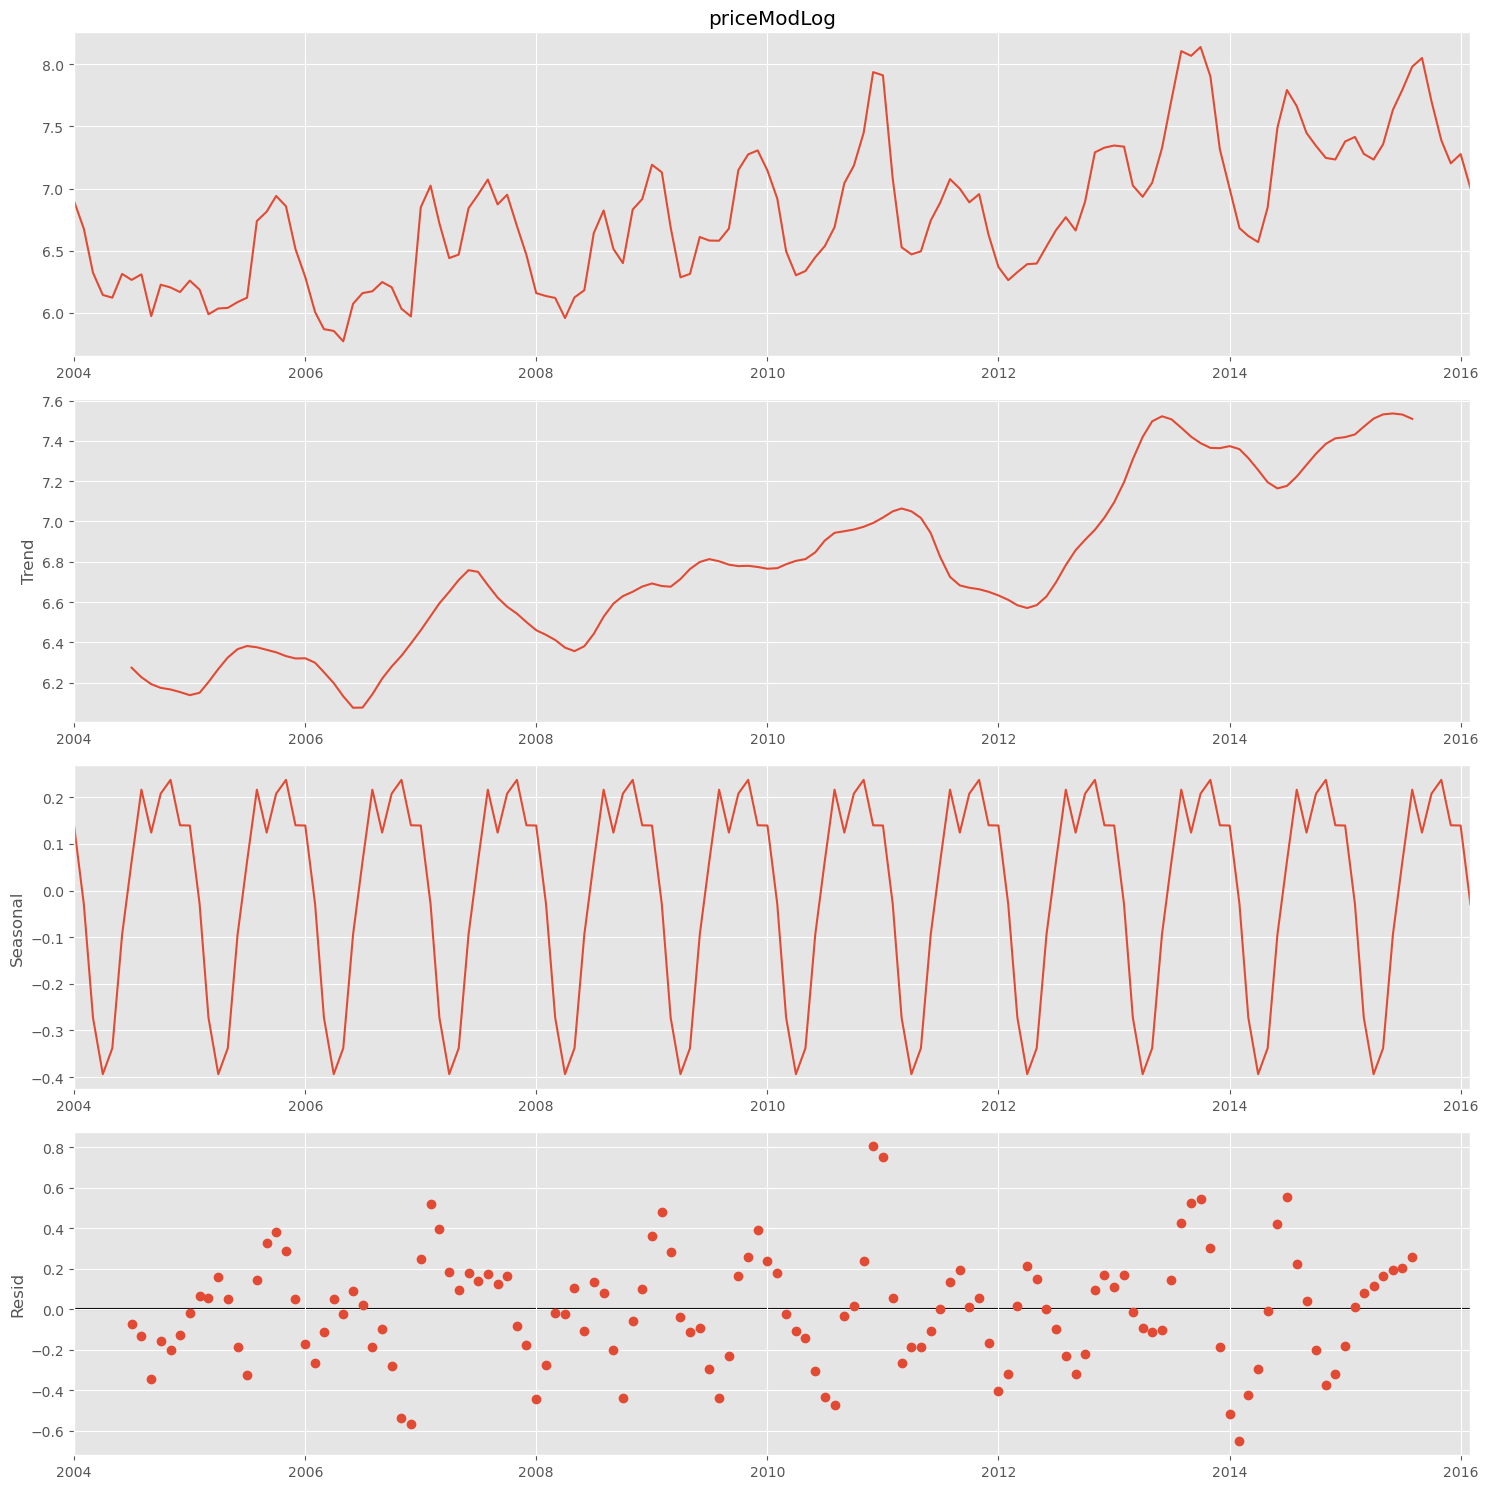

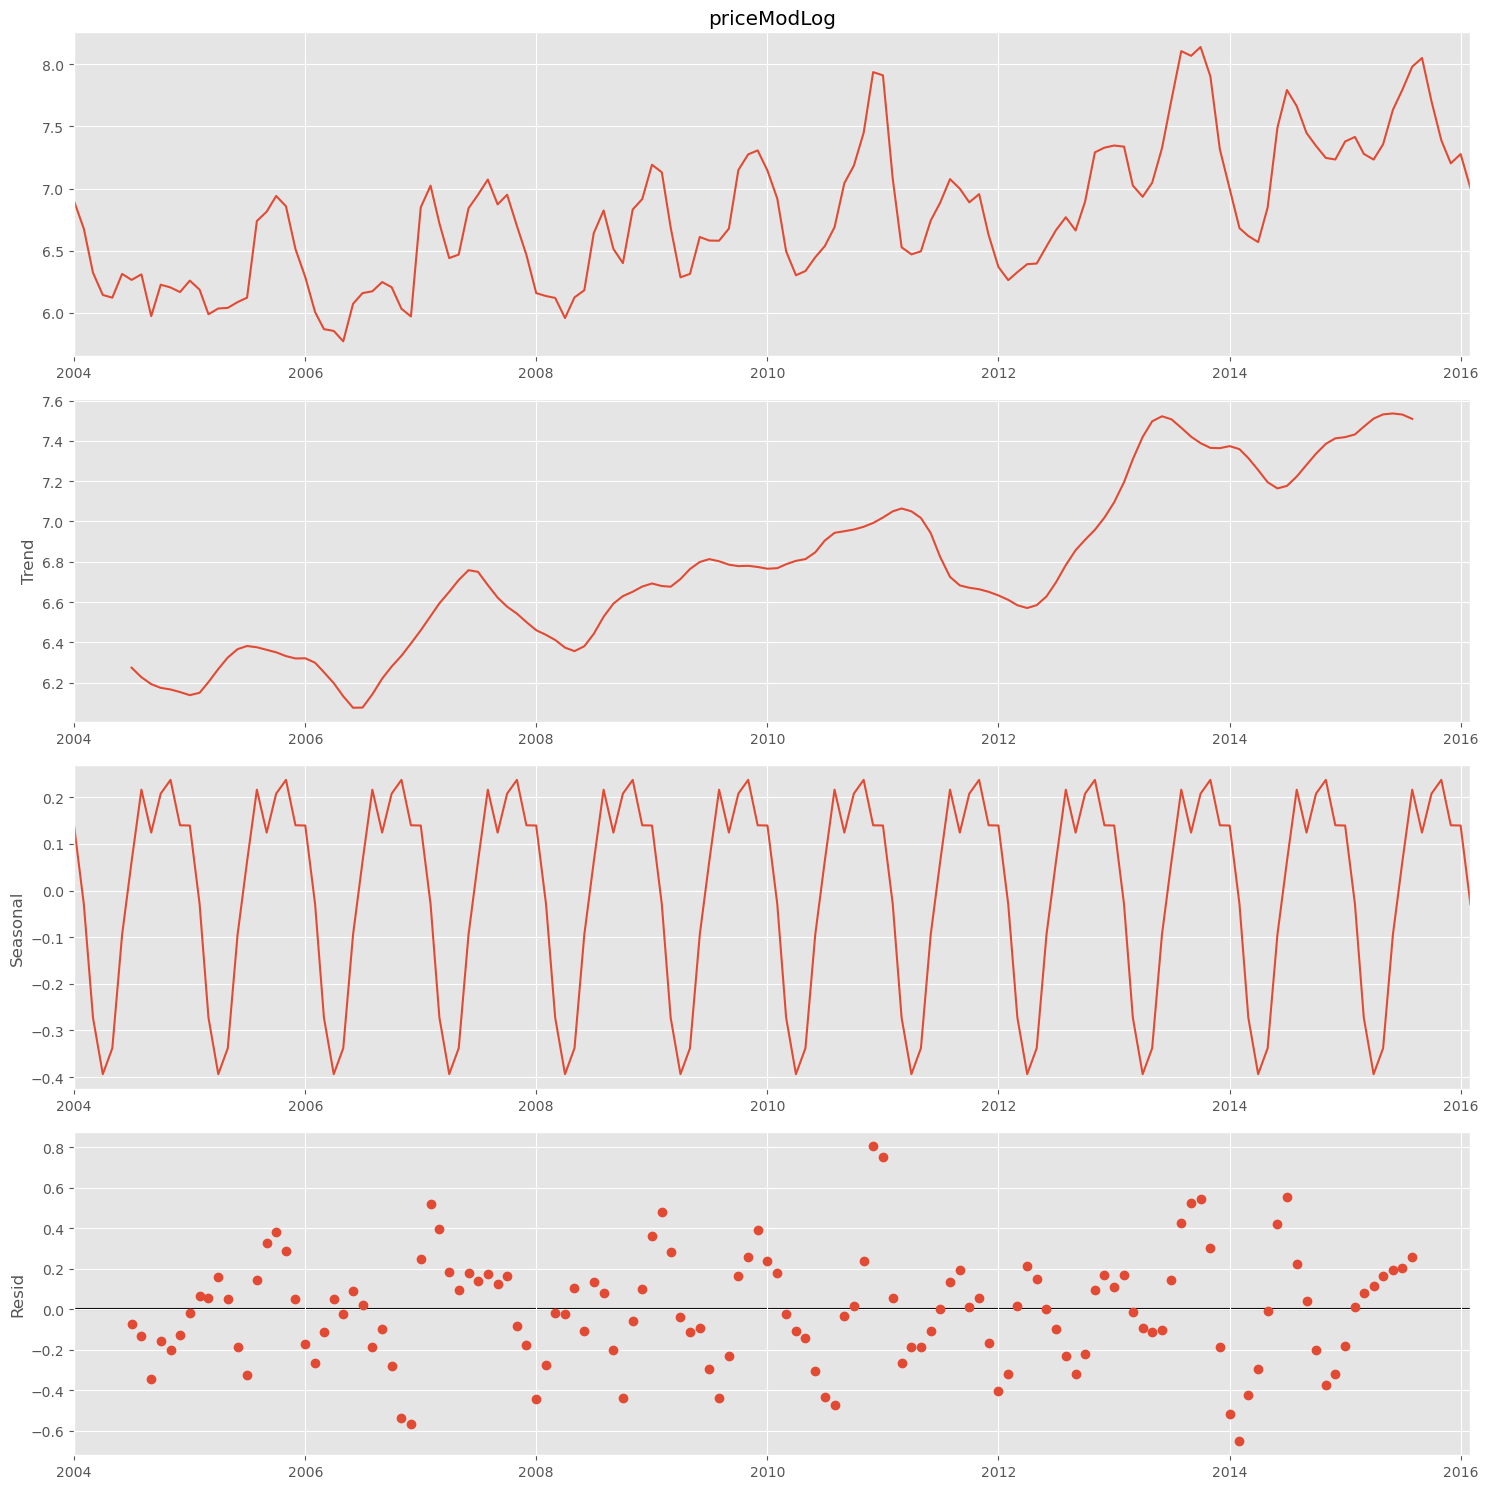

In [ ]:
decomposition.plot()

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [ ]:
# Построим ряд по тренду и сезонности
dfBang["priceDecomp"] = np.exp(trend + seasonal)

In [ ]:
# Расчет RMSE
model_Decomp_RMSE = RMSE(dfBang.priceDecomp, dfBang.priceMod)
model_Decomp_RMSE

374.1085846480236

<AxesSubplot:xlabel='timeIndex'>

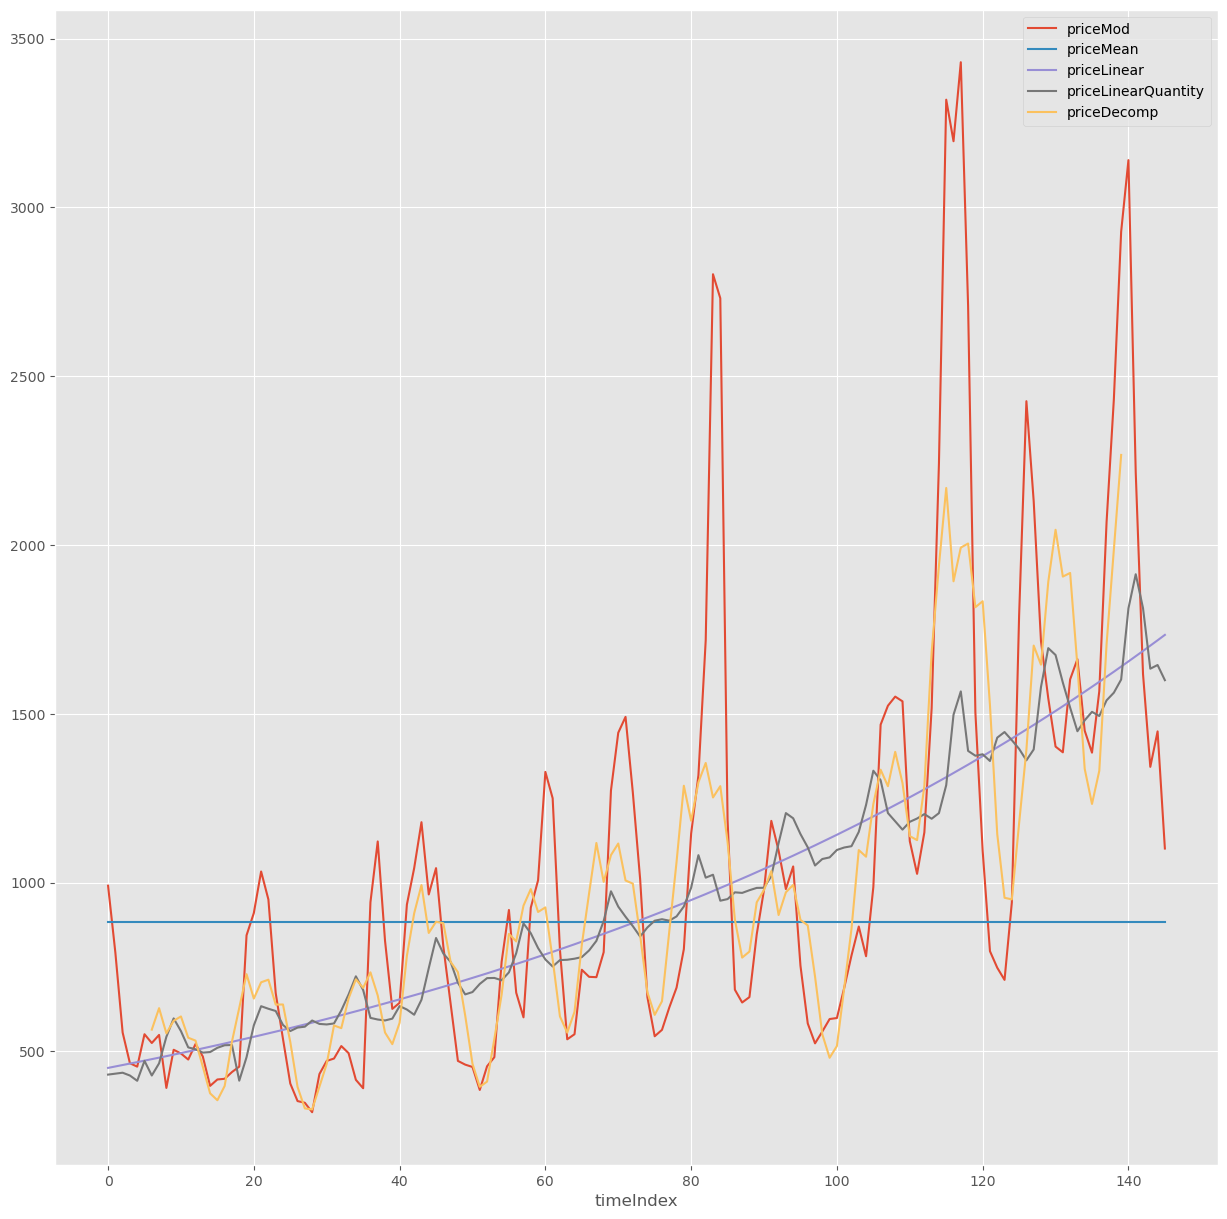

In [ ]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", "priceLinearQuantity", "priceDecomp"])

In [ ]:
dfBangResults

,Model,RMSE
0,Mean,683.95
1,Linear,518.52


In [ ]:
dfBangResults.loc[3,"Model"] = "priceDecomp"
dfBangResults.loc[3,"RMSE"] = model_Decomp_RMSE
dfBangResults.head()

,Model,RMSE
0,Mean,683.95
1,Linear,518.52
3,priceDecomp,374.11


### Задание 9. Декомпозируйте ряд остатков quantity

In [ ]:
### your code here

## 5. Стационарность ряда

Перед тем, как перейти к моделированию, стоит сказать о таком важном свойстве временного ряда, как стационарность.  
Под стационарностью понимают свойство процесса не менять своих статистических характеристик с течением времени, а именно постоянство матожидания, постоянство дисперсии и независимость ковариационной функции от времени (должна зависеть только от расстояния между наблюдениями). Наглядно можно посмотреть на эти свойства на картинках:

![](https://habrastorage.org/files/20c/9d8/a63/20c9d8a633ec436f91dccd4aedcc6940.png)  
Временной ряд справа не является стационарным, так как его матожидание со временем растёт

![](https://habrastorage.org/files/b88/eec/a67/b88eeca676d642449cab135273fd5a95.png)  
Здесь не повезло с дисперсией — разброс значений ряда существенно варьируется в зависимости от периода

![](https://habrastorage.org/files/2f6/1ee/cb2/2f61eecb20714352840748b826e38680.png)  
На последнем графике видно, что значения ряда внезапно становятся ближе друг ко другу, образуя некоторый кластер, а в результате получаем непостоянство ковариаций


Почему стационарность так важна?  
По стационарному ряду просто строить прогноз, так как мы полагаем, что его будущие статистические характеристики не будут отличаться от наблюдаемых текущих. Большинство моделей временных рядов так или иначе моделируют и предсказывают эти характеристики (например, матожидание или дисперсию), поэтому в случае нестационарности исходного ряда предсказания окажутся неверными. К сожалению, большинство временных рядов, с которыми приходится сталкиваться за пределыми учебных материалов, стационарными не являются, но с этим можно (и нужно) бороться.

In [ ]:
test = sm.tsa.adfuller(dfBang.priceMod)
print('adf: ', test[0])
print('p-value: ', test[1])
print('Critical values: ', test[4])
if test[0]> test[4]['5%']: 
    print('Есть единичные корни, ряд не стационарен')
else:
    print('Единичных корней нет, ряд стационарен')

# p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
# p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

adf:  -4.004401077671535
p-value:  0.0013876404423154639
Critical values:  {'1%': -3.4769274060112707, '5%': -2.8819726324025625, '10%': -2.577665408088415}
Единичных корней нет, ряд стационарен


### Расчет лагов
Представим временной ряд в виде последовательности разницы между значениями.  
Рассчитаем лаги, выведем их на графике

In [ ]:
# Рассчитаем лаги
dfBang["priceModLogShift1"] = dfBang.priceModLog.shift()

<AxesSubplot:xlabel='priceModLogShift1', ylabel='priceModLog'>

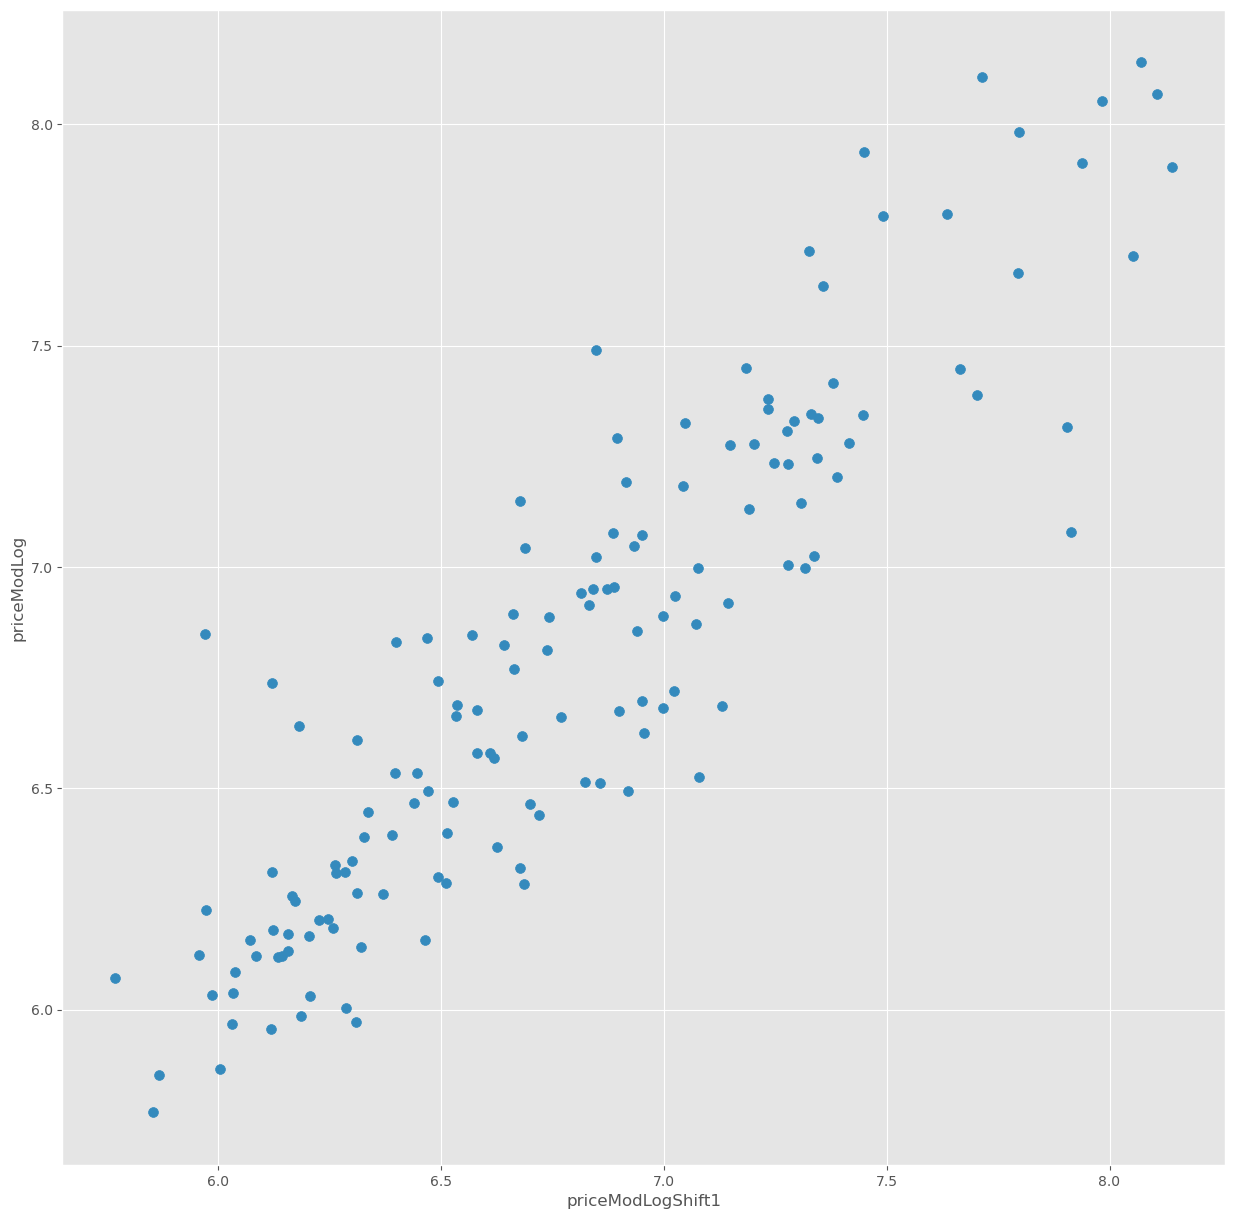

In [ ]:
# Выведем на графике priceModLog и priceModLogShift1
dfBang.plot(kind= "scatter", y = "priceModLog", x = "priceModLogShift1", s = 50)

In [ ]:
dfBang["priceModLogDiff"] = dfBang.priceModLog - dfBang.priceModLogShift1

<AxesSubplot:xlabel='date_ind'>

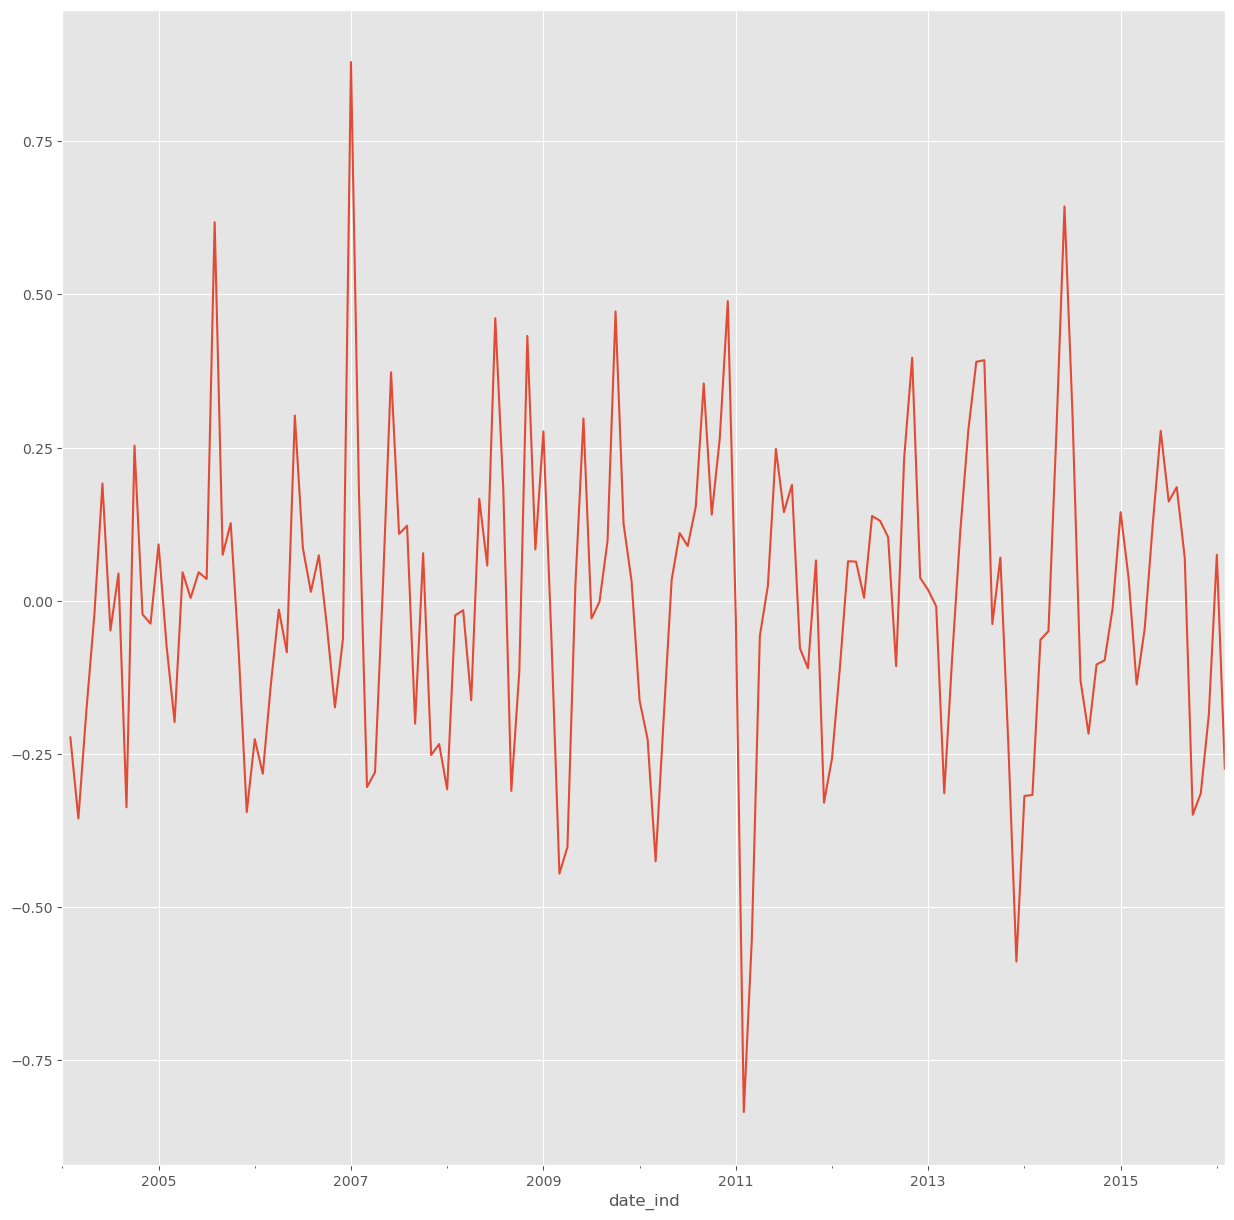

In [ ]:
dfBang.priceModLogDiff.plot()

## 6. Построение модели АRIMA

Для моделирования будем использовать модель ARIMA, построенную для ряда первых разностей.  
Итак, чтобы построить модель нам нужно знать ее порядок, состоящий из 2-х параметров:  
- p — порядок компоненты AR
- d — порядок интегрированного ряда (порядок разности временного ряда)
- q — порядок компонетны MA  


Параметр d равет 1, осталось определить p и q. Для их определения нам надо изучить авторкорреляционную (ACF) и частично автокорреляционную (PACF) функции для ряда первых разностей.
ACF поможет нам определить q, т. к. по ее коррелограмме можно определить количество автокорреляционных коэффициентов сильно отличных от 0 в модели MA
PACF поможет нам определить p, т. к. по ее коррелограмме можно определить максимальный номер коэффициента сильно отличный от 0 в модели AR.  

Чтобы построить соответствующие коррелограммы, в пакете statsmodels имеются следующие функции: acf и pacf.  
Можем построить графики ACF и PACF, у которых по оси X откладываются номера лагов, а по оси Y значения соответствующих функций. Нужно отметить, что количество лагов в функциях и определяет число значимых коэффициентов.

In [ ]:
ts = dfBang.priceModLog
ts_diff = dfBang.priceModLogDiff
ts_diff.dropna(inplace = True)

In [ ]:
ts = dfBang.priceModLog
ts_diff = dfBang.priceModLogDiff
ts_diff.dropna(inplace = True)

In [ ]:
# ACF и PACF 
from statsmodels.tsa.stattools import acf, pacf

In [ ]:
lag_acf = acf(ts_diff, nlags=20)

In [ ]:
lag_acf

array([ 1.        ,  0.40215445, -0.02855346, -0.21472715, -0.23756032,
       -0.26332645, -0.22038359, -0.08576989, -0.0754398 ,  0.01497797,
        0.12361818,  0.20862956,  0.158123  ,  0.02053933, -0.01290934,
       -0.07097602, -0.17993659, -0.09514604, -0.04878255, -0.08854117,
       -0.18810881])

In [ ]:
ACF = pd.Series(lag_acf)

In [ ]:
ACF

0     1.00
1     0.40
2    -0.03
3    -0.21
4    -0.24
5    -0.26
6    -0.22
7    -0.09
8    -0.08
9     0.01
10    0.12
11    0.21
12    0.16
13    0.02
14   -0.01
15   -0.07
16   -0.18
17   -0.10
18   -0.05
19   -0.09
20   -0.19
dtype: float64

<AxesSubplot:>

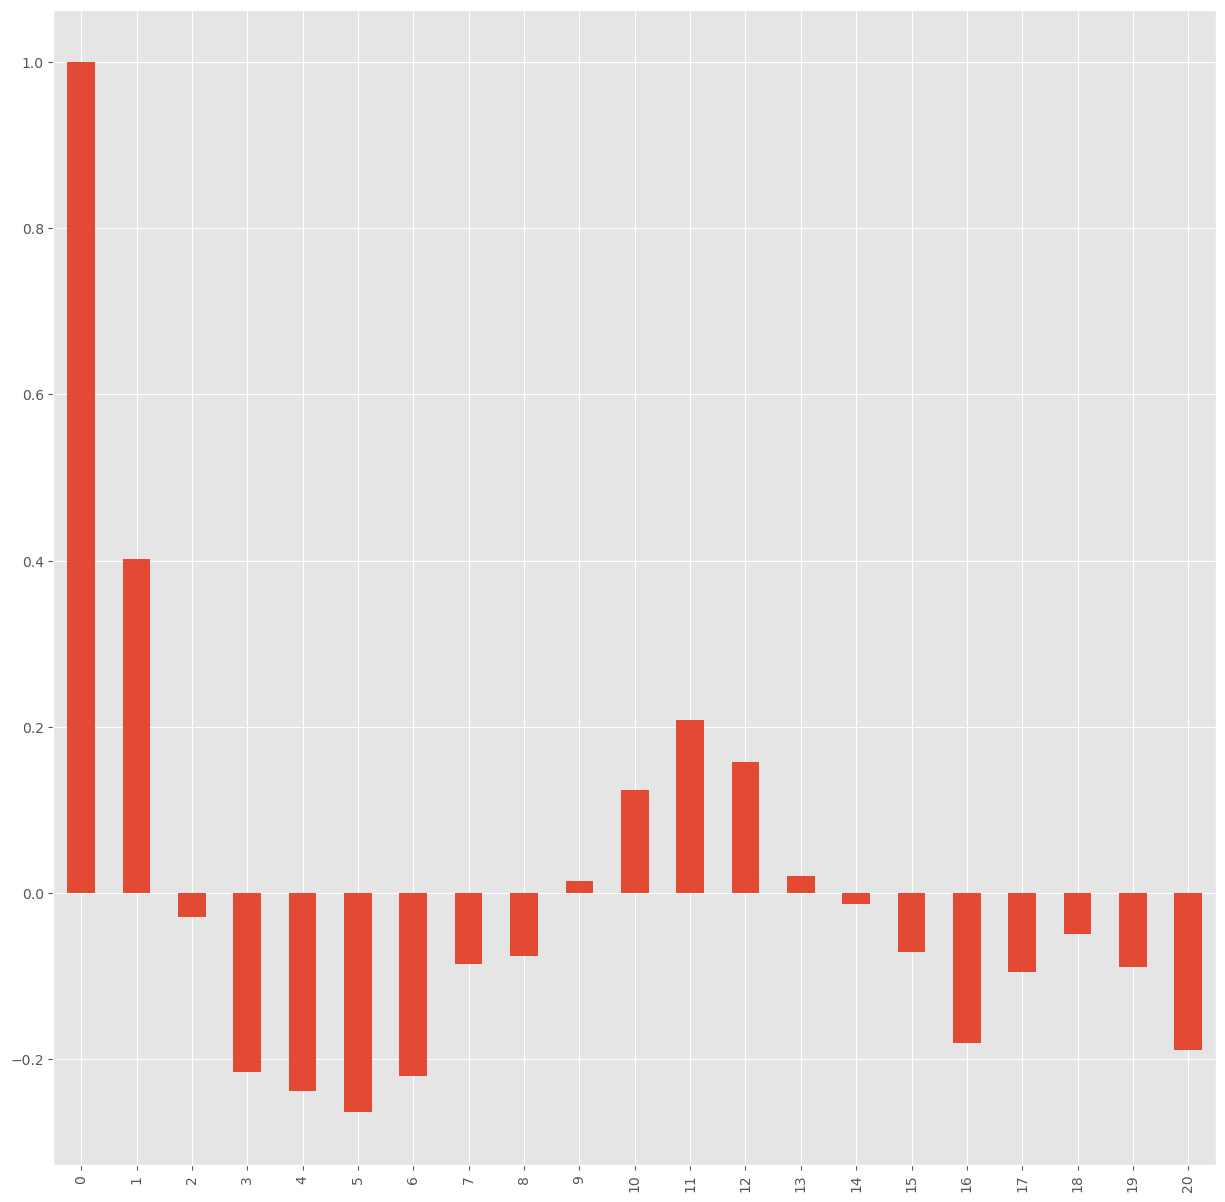

In [ ]:
ACF.plot(kind = "bar")

In [ ]:
lag_pacf = pacf(ts_diff, nlags=20, method='ols')

In [ ]:
PACF = pd.Series(lag_pacf)

<AxesSubplot:>

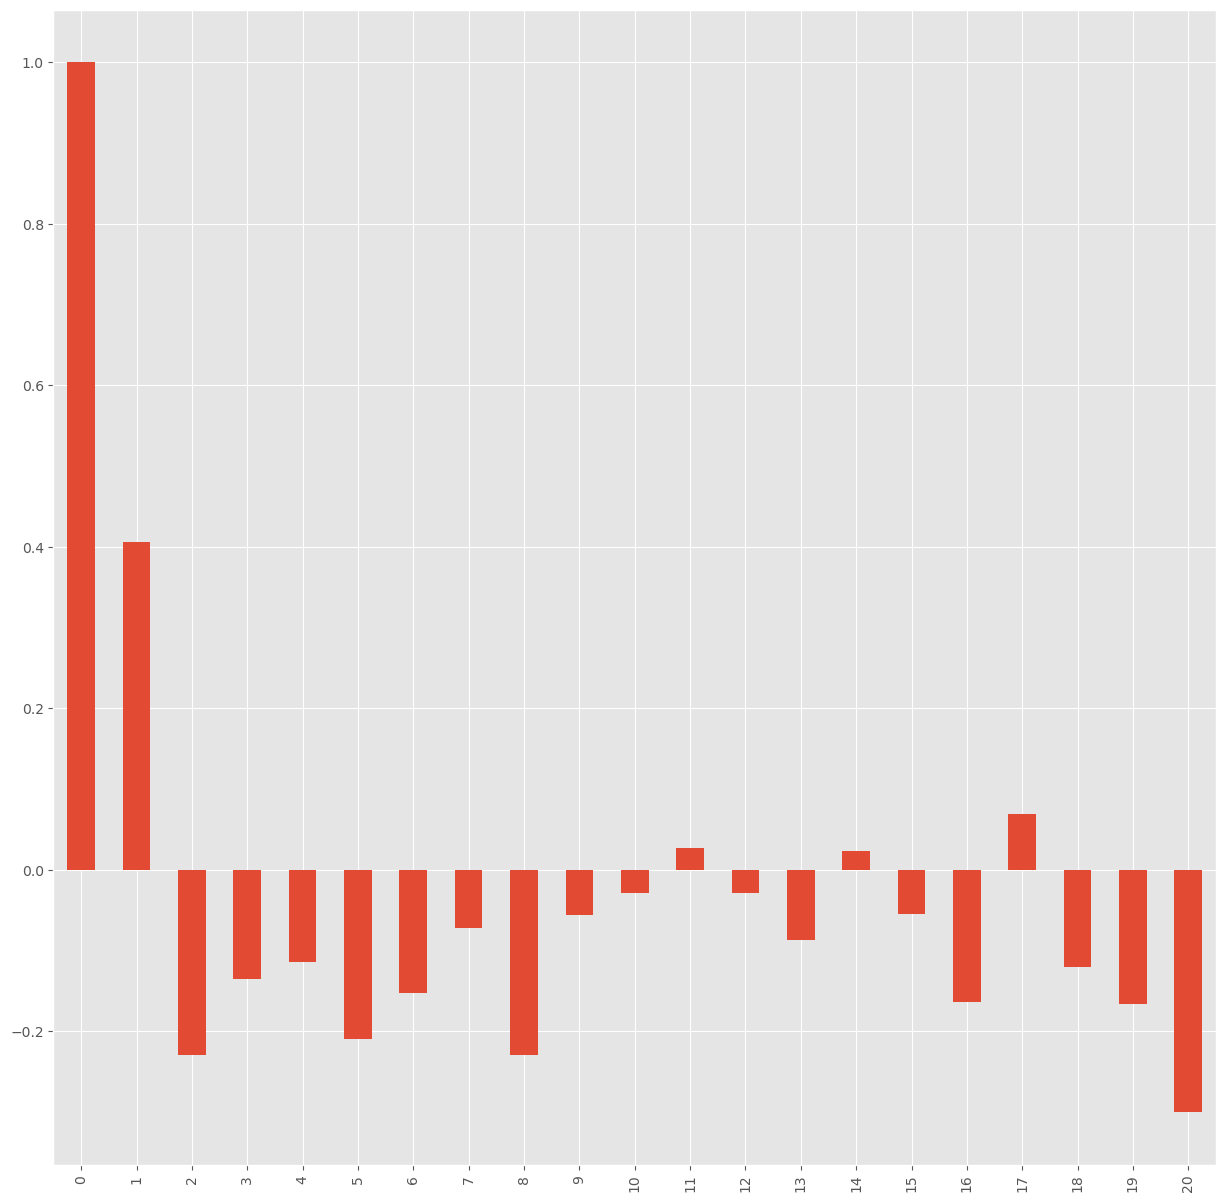

In [ ]:
PACF.plot(kind = "bar")

## Построим модель ARIMA 

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
ts_diff.head()

date_ind
2004-02-01   -0.22
2004-03-01   -0.36
2004-04-01   -0.18
2004-05-01   -0.02
2004-06-01    0.19
Freq: MS, Name: priceModLogDiff, dtype: float64

In [ ]:
# ARIMA Model (1,0,1)
model_AR1MA = ARIMA(ts_diff, order=(1,0,1))

In [ ]:
results_ARIMA = model_AR1MA.fit()

In [ ]:
results_ARIMA.fittedvalues.head()

date_ind
2004-02-01   -0.00
2004-03-01   -0.09
2004-04-01   -0.14
2004-05-01   -0.04
2004-06-01    0.00
Freq: MS, dtype: float64

<AxesSubplot:xlabel='date_ind'>

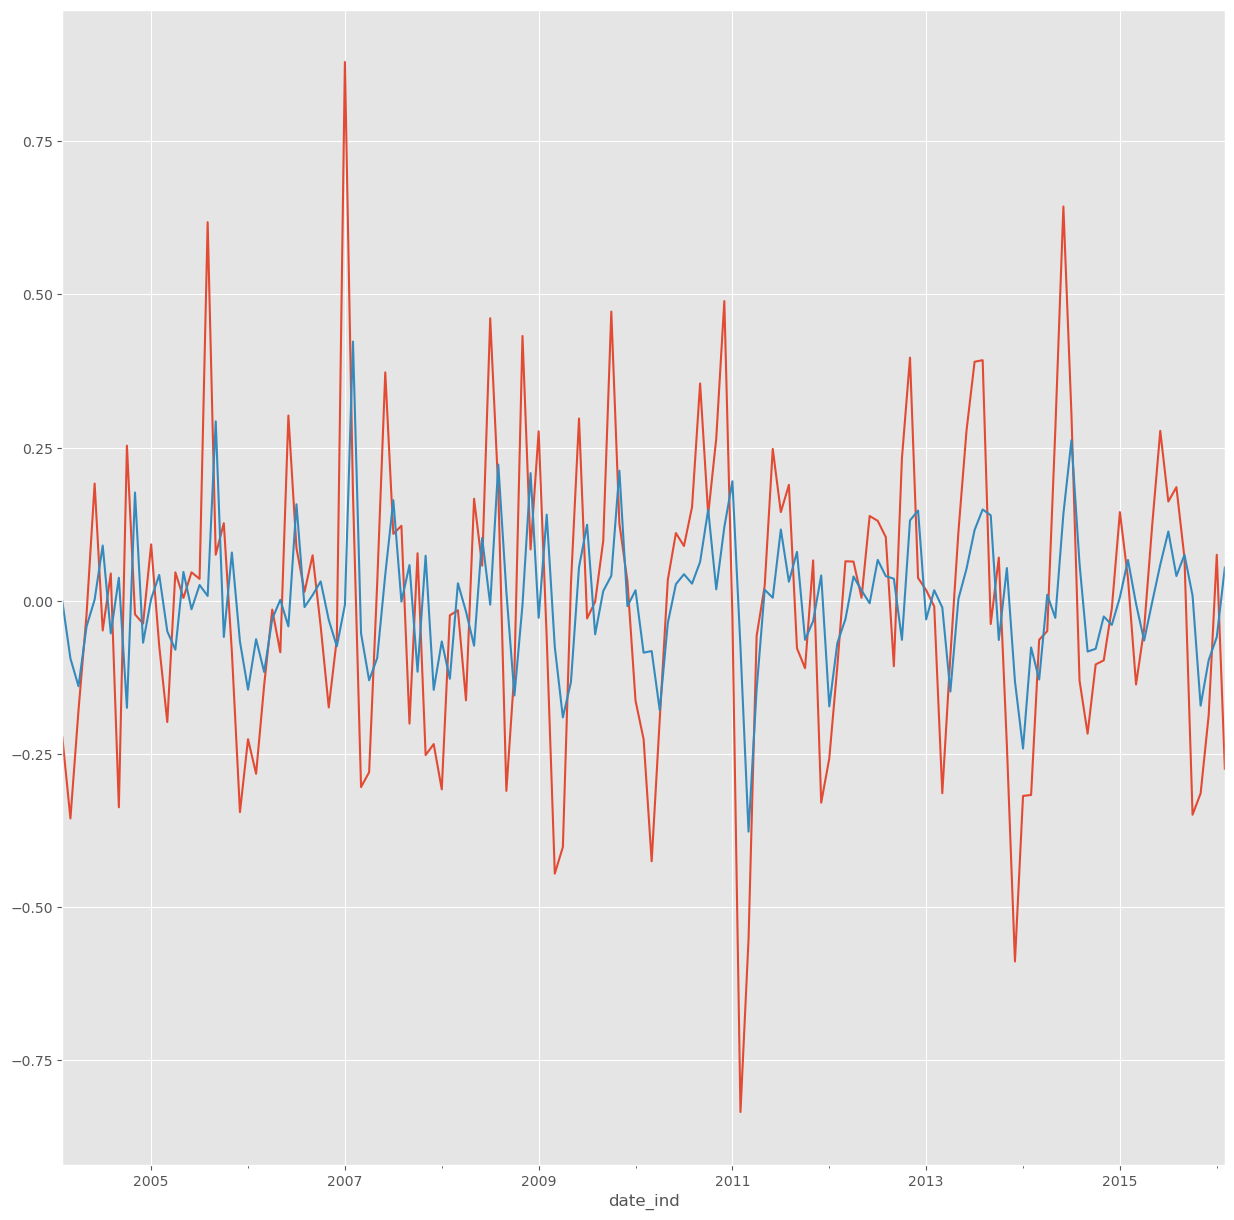

In [ ]:
ts_diff.plot()
results_ARIMA.fittedvalues.plot()

In [ ]:
ts_diff.sum()

0.1052596023926915

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.tail()

date_ind
2015-10-01    0.01
2015-11-01   -0.17
2015-12-01   -0.10
2016-01-01   -0.06
2016-02-01    0.05
Freq: MS, dtype: float64

In [ ]:
predictions_ARIMA_diff.sum()

0.07147674306950122

In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.tail()

date_ind
2015-10-01   0.34
2015-11-01   0.17
2015-12-01   0.08
2016-01-01   0.02
2016-02-01   0.07
Freq: MS, dtype: float64

In [ ]:
ts.iloc[0]

6.898714534329988

In [ ]:
predictions_ARIMA_log = pd.Series(ts.iloc[0], index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.tail()

date_ind
2015-10-01   7.24
2015-11-01   7.07
2015-12-01   6.98
2016-01-01   6.92
2016-02-01   6.97
Freq: MS, dtype: float64

In [ ]:
dfBang['priceARIMA'] = np.exp(predictions_ARIMA_log)

In [ ]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod", "priceARIMA"])

In [ ]:
dfBang.plot(kind="line", x="timeIndex", y = ["priceMod", "priceMean", "priceLinear", 
                                             "priceLinearQuantity", "priceARIMA"])

In [ ]:
# RMSE
model_arima_RMSE = RMSE(dfBang.priceARIMA, dfBang.priceMod)
model_arima_RMSE

Обычно подбор параметров для ARIMA — сложный и трудоемкий процесс.  
23-го февраля 2017 года команда Core Data Science из Facebook выпустила новую библиотеку для работы с временными рядами — Prophet. Попробуйте применить новую библиотеку и посмотрите на удобство в использовании и качество предсказания.

### Вывод

На семинаре мы ознакомились с разными подходами к анализу и прогнозированию временных рядов.  
Была рассмотрена интегрированная модель авторегрессии – скользящего среднего (ARIMA), как базовая модель прогнозирования.  
Как вы уже убедились, серебряной пули для решения такого рода задач пока нет.  
Методы, разработанные в 60-е годы прошлого века, (а некоторые и в начале 19-го), по-прежнему пользуются популярностью наравне с неразобранными в рамках данной статьи LSTM или RNN. Отчасти это связано с тем, что задача прогнозирования, как и любая другая задача, возникающая в процессе работы с данными — во многом творческая и уж точно исследовательская. Несмотря на обилие формальных метрик качества и способов оценки параметров, для каждого временного ряда часто приходится подбирать и пробовать что-то своё. Не последнюю роль играет и баланс между качеством и трудозатратами.